In [1]:
import pandas as pd
import numpy as np
import ahrs
from ahrs.filters import Madgwick
import glob
from IPython.display import display
import os
import matplotlib.pyplot as plt

In [2]:
#Load the Data into a list and dictonary with its names

path = 'IMUData/' 
all_files = glob.glob(path + "/*.txt")

li = []
data_dict={}
for filename in all_files:
    with open(filename, 'r') as f:
        if filename.endswith('.txt'):
            file_path = os.path.join(path, filename)
            txt = f.readlines()
            header = txt[4].split('\t')
            data = np.genfromtxt(filename, delimiter='\t', skip_header=5)
            data = data[:, 2::]
            header = header[2::]
            header[-1] = header[-1][0:-1]
            df = pd.DataFrame(data, columns = header)
            print(filename)
            li.append(df)
            data_dict[filename] = df

IMUData\MT_01200651-000-000_00B42941.txt
IMUData\MT_01200651-000-000_00B42948.txt
IMUData\MT_01200651-000-000_00B42955.txt
IMUData\MT_01200651-000-000_00B4295B.txt
IMUData\MT_01200651-000-000_00B4295E.txt
IMUData\MT_01200651-000-000_00B42960.txt
IMUData\MT_01200651-000-000_00B42968.txt
IMUData\MT_01200651-000-000_00B42985.txt
IMUData\MT_01200651-000-000_00B42991.txt
IMUData\MT_01200651-000-000_00B42998.txt
IMUData\MT_01200651-000-000_00B429A0.txt
IMUData\MT_01200651-000-000_00B429B6.txt
IMUData\MT_01200651-000-000_00B429BB.txt
IMUData\MT_01200651-000-000_00B429C3.txt


In [3]:
data_dict

{'IMUData\\MT_01200651-000-000_00B42941.txt':          Acc_X     Acc_Y     Acc_Z     Gyr_X     Gyr_Y     Gyr_Z  OriInc_q0  \
 0     8.159805 -2.673411  4.943489  0.178380  0.007771  0.106333   0.999997   
 1     8.399591 -2.366687  5.179438  0.056675 -0.039339  0.113295   0.999999   
 2     8.933006 -2.963096  5.202046 -0.088489 -0.104680  0.052123   0.999998   
 3     8.926894 -3.341119  5.175038  0.078533 -0.147552  0.029408   0.999998   
 4     8.611748 -2.859453  5.233421  0.178140 -0.169218  0.060131   0.999995   
 ...        ...       ...       ...       ...       ...       ...        ...   
 2363  8.765833 -3.484240  2.973640 -0.093265  0.059320 -0.007382   0.999999   
 2364  8.858646 -3.676499  3.003251 -0.043516  0.013892 -0.074339   0.999999   
 2365  8.726692 -3.644195  3.133983  0.057870 -0.003428 -0.108275   0.999999   
 2366  8.702094 -3.307714  3.270393  0.038323 -0.035168 -0.115549   0.999999   
 2367  8.877671 -3.335803  3.261882 -0.046377 -0.059033 -0.136111   0.99999

In [4]:
for filename, df in data_dict.items():
    print(f"Dataframe for file: {filename}")
    display(df)

Dataframe for file: IMUData\MT_01200651-000-000_00B42941.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,8.159805,-2.673411,4.943489,0.178380,0.007771,0.106333,0.999997,0.002230,0.000097,0.001329,0.298807,0.481447,0.823968,-0.540209,0.797095,-0.269841,-0.786695,-0.364484,0.498260
1,8.399591,-2.366687,5.179438,0.056675,-0.039339,0.113295,0.999999,0.000708,-0.000492,0.001416,0.296501,0.483343,0.823691,-0.542166,0.795211,-0.271469,-0.786221,-0.366087,0.497833
2,8.933006,-2.963096,5.202046,-0.088489,-0.104680,0.052123,0.999998,-0.001106,-0.001309,0.000652,0.293707,0.483312,0.824709,-0.540853,0.795402,-0.273521,-0.788172,-0.365711,0.495016
3,8.926894,-3.341119,5.175038,0.078533,-0.147552,0.029408,0.999998,0.000982,-0.001844,0.000368,0.290351,0.482393,0.826434,-0.542671,0.794341,-0.273003,-0.788165,-0.369215,0.492418
4,8.611748,-2.859453,5.233421,0.178140,-0.169218,0.060131,0.999995,0.002227,-0.002115,0.000752,0.286117,0.481919,0.828186,-0.546644,0.791961,-0.271988,-0.786967,-0.374902,0.490031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,8.765833,-3.484240,2.973640,-0.093265,0.059320,-0.007382,0.999999,-0.001166,0.000741,-0.000092,0.390556,0.102273,0.914881,0.445087,0.848955,-0.284908,-0.805831,0.518474,0.286044
2364,8.858646,-3.676499,3.003251,-0.043516,0.013892,-0.074339,0.999999,-0.000544,0.000174,-0.000929,0.390238,0.100415,0.915222,0.446927,0.848410,-0.283648,-0.804966,0.519728,0.286204
2365,8.726692,-3.644195,3.133983,0.057870,-0.003428,-0.108275,0.999999,0.000723,-0.000043,-0.001353,0.389236,0.098041,0.915906,0.447002,0.849293,-0.280875,-0.805410,0.518738,0.286751
2366,8.702094,-3.307714,3.270393,0.038323,-0.035168,-0.115549,0.999999,0.000479,-0.000440,-0.001444,0.387464,0.095866,0.916887,0.447455,0.850012,-0.277962,-0.806012,0.517966,0.286453


Dataframe for file: IMUData\MT_01200651-000-000_00B42948.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.179437,-3.230219,-2.386222,-0.640048,-0.056930,0.166316,0.999966,-0.008001,-0.000712,0.002079,-0.317494,0.241484,0.916997,-0.233324,0.917406,-0.322376,-0.919107,-0.316310,-0.234927
1,9.280106,-3.510967,-2.258520,-0.639010,-0.015465,0.122626,0.999967,-0.007988,-0.000193,0.001533,-0.318541,0.244183,0.915918,-0.217638,0.921598,-0.321389,-0.922586,-0.301715,-0.240423
2,9.400275,-3.559057,-1.760128,-0.603451,0.018878,0.061328,0.999971,-0.007543,0.000236,0.000767,-0.319927,0.245389,0.915113,-0.203034,0.925681,-0.319204,-0.925432,-0.287921,-0.246328
3,9.315505,-3.108221,-2.227169,-0.568961,0.053808,0.010924,0.999974,-0.007112,0.000673,0.000137,-0.318157,0.244234,0.916038,-0.192833,0.929375,-0.314765,-0.928220,-0.276787,-0.248590
4,9.517375,-3.086658,-2.298231,-0.580162,0.083225,-0.061877,0.999973,-0.007252,0.001040,-0.000773,-0.314806,0.244530,0.917116,-0.181205,0.932989,-0.310961,-0.931698,-0.264079,-0.249400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.057965,-2.032078,-2.891360,-0.028825,-0.029275,-0.016692,1.000000,-0.000360,-0.000366,-0.000209,-0.023618,0.417748,0.908256,0.873598,0.450350,-0.184420,-0.486074,0.789095,-0.375581
2364,8.968733,-1.758421,-2.923256,0.004616,-0.030078,-0.011922,1.000000,0.000058,-0.000376,-0.000149,-0.023808,0.418388,0.907956,0.873722,0.450082,-0.184488,-0.485843,0.788909,-0.376271
2365,9.056733,-2.011840,-2.964566,0.038092,-0.026617,-0.006681,1.000000,0.000476,-0.000333,-0.000084,-0.023849,0.419000,0.907673,0.873436,0.450435,-0.184980,-0.486354,0.788383,-0.376712
2366,9.169390,-1.835213,-3.062877,0.099384,-0.025403,-0.016560,0.999999,0.001242,-0.000318,-0.000207,-0.024093,0.419486,0.907442,0.872403,0.452086,-0.185825,-0.488193,0.787178,-0.376853


Dataframe for file: IMUData\MT_01200651-000-000_00B42955.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.067799,-1.183220,3.453851,0.140376,0.022269,0.039929,0.999998,0.001755,0.000278,0.000499,0.368673,0.057258,0.927794,0.152680,0.980816,-0.121200,-0.916935,0.186338,0.352858
1,9.205957,-0.938665,3.437371,0.141099,-0.017113,0.047697,0.999998,0.001764,-0.000214,0.000596,0.368460,0.058507,0.927801,0.149004,0.981398,-0.121061,-0.917625,0.182853,0.352888
2,9.697750,-0.971939,3.414621,0.173598,-0.077158,0.075074,0.999997,0.002170,-0.000964,0.000938,0.366963,0.060697,0.928253,0.144330,0.982070,-0.121273,-0.918970,0.178478,0.351624
3,9.817309,-0.997431,3.492241,0.245563,-0.114521,0.081184,0.999994,0.003070,-0.001432,0.001015,0.364592,0.063171,0.929022,0.137943,0.983024,-0.120978,-0.920893,0.172260,0.349688
4,9.539143,-0.974403,3.510247,0.284008,-0.149533,0.041617,0.999992,0.003550,-0.001869,0.000520,0.361226,0.064768,0.930226,0.131027,0.984162,-0.119404,-0.923227,0.165016,0.347018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.609921,-0.610612,1.359932,-0.021425,0.135618,-0.079862,0.999998,-0.000268,0.001695,-0.000998,0.124673,-0.103442,0.986791,0.847585,0.528132,-0.051723,-0.515806,0.842838,0.153520
2364,9.653077,-0.654917,1.389705,0.085758,0.120850,-0.096775,0.999998,0.001072,0.001511,-0.001210,0.124524,-0.107654,0.986359,0.846797,0.529645,-0.049098,-0.517134,0.841360,0.157115
2365,9.561127,-0.607289,1.526821,0.140086,0.108253,-0.122479,0.999996,0.001751,0.001353,-0.001531,0.123662,-0.111907,0.985994,0.845390,0.532197,-0.045626,-0.519638,0.839192,0.160417
2366,9.529148,-0.576336,1.553564,0.109368,0.094124,-0.153358,0.999997,0.001367,0.001177,-0.001917,0.121985,-0.116296,0.985695,0.844458,0.534011,-0.041502,-0.521545,0.837441,0.163348


Dataframe for file: IMUData\MT_01200651-000-000_00B4295B.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.700512,-0.468185,1.727579,-0.575608,0.364875,0.162204,0.999962,-0.007195,0.004561,0.002028,-0.084380,-0.155139,0.984282,0.732696,-0.679118,-0.044228,0.675305,0.717447,0.170974
1,10.085542,-1.121784,1.062343,-0.834971,0.321573,-0.005788,0.999937,-0.010437,0.004020,-0.000072,-0.089973,-0.160745,0.982887,0.718435,-0.693955,-0.047727,0.689751,0.701846,0.177922
2,9.952109,-2.050434,0.623017,-0.676852,0.309406,-0.066835,0.999956,-0.008461,0.003868,-0.000835,-0.095738,-0.161968,0.982141,0.704579,-0.707996,-0.048076,0.703138,0.687393,0.181901
3,9.899131,-1.361891,1.269855,-0.397301,0.322317,-0.088346,0.999979,-0.004966,0.004029,-0.001104,-0.097405,-0.166168,0.981275,0.695789,-0.716344,-0.052239,0.711611,0.677672,0.185393
4,10.200788,-1.640167,1.210452,-0.414960,0.298845,-0.169938,0.999977,-0.005187,0.003736,-0.002124,-0.099451,-0.171249,0.980195,0.686940,-0.724485,-0.056877,0.719877,0.667679,0.189689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.832103,0.251182,1.583741,-0.015352,0.004409,-0.168772,0.999998,-0.000192,0.000055,-0.002110,0.050537,0.103346,0.993361,0.373015,-0.924607,0.077216,0.926448,0.366636,-0.085277
2364,9.776529,0.310195,1.739162,0.005257,0.029464,-0.157143,0.999998,0.000066,0.000368,-0.001964,0.048322,0.106377,0.993151,0.373196,-0.924224,0.080837,0.926493,0.366734,-0.084360
2365,9.810945,0.463805,1.871548,0.037235,0.034807,-0.138225,0.999998,0.000465,0.000435,-0.001728,0.046144,0.108910,0.992980,0.374081,-0.923591,0.083916,0.926247,0.367583,-0.083360
2366,10.012779,0.554323,1.903021,0.020026,0.011346,-0.113759,0.999999,0.000250,0.000142,-0.001422,0.044719,0.111085,0.992804,0.374524,-0.923180,0.086425,0.926138,0.367965,-0.082888


Dataframe for file: IMUData\MT_01200651-000-000_00B4295E.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.012399,-1.931064,6.328686,0.132333,0.010048,0.013731,0.999999,0.001654,0.000126,0.000172,0.210151,0.553092,0.806180,-0.809724,0.560571,-0.173514,-0.547890,-0.616319,0.565657
1,9.145087,-2.101354,6.117565,0.291588,0.017938,0.019965,0.999993,0.003645,0.000224,0.000250,0.209990,0.553648,0.805840,-0.813801,0.555788,-0.169787,-0.541878,-0.620140,0.567269
2,9.606738,-1.949808,6.020672,0.407021,-0.009832,0.080670,0.999987,0.005088,-0.000123,0.001008,0.208218,0.554696,0.805579,-0.819683,0.548328,-0.165698,-0.533633,-0.625819,0.568847
3,9.674612,-1.517613,6.023646,0.326539,-0.075265,0.132818,0.999990,0.004082,-0.000941,0.001660,0.204467,0.555321,0.806109,-0.824689,0.541360,-0.163758,-0.527334,-0.631306,0.568658
4,9.385255,-1.371889,5.936523,0.207881,-0.190811,0.109184,0.999993,0.002599,-0.002385,0.001365,0.199692,0.553799,0.808350,-0.827948,0.536573,-0.163072,-0.524047,-0.636707,0.565666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.379098,-2.080625,4.506923,0.036215,0.082308,-0.182951,0.999997,0.000453,0.001029,-0.002287,0.217463,0.344980,0.913071,-0.162016,0.935239,-0.314768,-0.962528,-0.079482,0.259272
2364,9.439202,-2.147560,4.463082,0.130929,0.074633,-0.168336,0.999996,0.001637,0.000933,-0.002104,0.220821,0.340897,0.913798,-0.164419,0.936529,-0.309645,-0.961355,-0.081870,0.262856
2365,9.290445,-1.881778,4.535145,0.189073,0.030868,-0.155197,0.999995,0.002363,0.000386,-0.001940,0.223104,0.337087,0.914657,-0.168405,0.937527,-0.304438,-0.960138,-0.086112,0.265933
2366,9.298461,-1.901080,4.566250,0.153775,-0.031748,-0.195738,0.999995,0.001922,-0.000397,-0.002447,0.224047,0.332282,0.916183,-0.171677,0.938837,-0.298516,-0.959338,-0.090406,0.267389


Dataframe for file: IMUData\MT_01200651-000-000_00B42960.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,3.886271,-1.231736,9.928085,-0.571195,1.083450,0.204300,0.999880,-0.007140,0.013543,0.002554,-0.626496,-0.683347,0.374887,0.702850,-0.703208,-0.107240,0.336906,0.196304,0.920847
1,5.243994,-1.680138,10.371218,-0.545761,0.947238,0.282626,0.999900,-0.006822,0.011840,0.003533,-0.629446,-0.692650,0.352185,0.702726,-0.700849,-0.122421,0.331623,0.170432,0.927890
2,6.009373,-2.194269,10.314747,-0.519047,1.257972,0.564760,0.999830,-0.006488,0.015724,0.007059,-0.631976,-0.703440,0.325238,0.705195,-0.696021,-0.135110,0.321414,0.143970,0.935931
3,4.995057,-2.634498,9.867116,-0.326186,1.380393,0.870298,0.999784,-0.004077,0.017254,0.010878,-0.622792,-0.724881,0.294410,0.718371,-0.678880,-0.151869,0.309956,0.116913,0.943535
4,5.422151,-3.096481,9.096163,-0.399817,0.913427,0.891722,0.999860,-0.004997,0.011417,0.011146,-0.608137,-0.743059,0.279345,0.730763,-0.661472,-0.168640,0.310089,0.101579,0.945265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,4.011115,1.078885,9.526629,-0.187295,-0.186392,-0.097387,0.999994,-0.002341,-0.002330,-0.001217,-0.780249,-0.477488,0.404001,0.567166,-0.812439,0.135150,0.263694,0.334587,0.904719
2364,4.200440,1.823853,9.745319,-0.283406,-0.107622,-0.018712,0.999993,-0.003543,-0.001345,-0.000234,-0.779626,-0.476212,0.406702,0.564989,-0.814987,0.128777,0.270131,0.330180,0.904439
2365,4.846005,2.045651,9.123396,-0.684274,0.060499,0.005662,0.999963,-0.008553,0.000756,0.000071,-0.779790,-0.476818,0.405675,0.560482,-0.820411,0.113076,0.278903,0.315549,0.906996
2366,5.529244,1.013021,8.471273,-0.584424,0.277694,-0.041307,0.999967,-0.007305,0.003471,-0.000516,-0.782139,-0.478112,0.399583,0.555660,-0.825366,0.100068,0.281958,0.300300,0.911219


Dataframe for file: IMUData\MT_01200651-000-000_00B42968.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.753260,1.496169,0.162118,-0.024760,0.081524,-0.025040,0.999999,-0.000310,0.001019,-0.000313,0.101860,0.112932,0.988368,-0.733652,-0.662466,0.151303,0.671847,-0.740530,0.015373
1,10.257147,1.622622,0.105787,0.054566,0.051062,0.054933,0.999999,0.000682,0.000638,0.000687,0.099995,0.112966,0.988554,-0.732874,-0.663631,0.149968,0.672977,-0.739481,0.016430
2,10.327375,1.780910,0.192762,0.020357,0.048127,0.128464,0.999998,0.000254,0.000602,0.001606,0.096825,0.111700,0.989014,-0.732838,-0.664382,0.146781,0.673478,-0.738999,0.017529
3,10.235639,1.679276,0.252315,0.027369,0.050222,0.145561,0.999998,0.000342,0.000628,0.001820,0.093323,0.110178,0.989521,-0.732703,-0.665315,0.143182,0.674119,-0.738387,0.018639
4,10.201230,1.628188,0.307668,0.077909,0.007307,0.179911,0.999997,0.000974,0.000091,0.002249,0.089934,0.107369,0.990143,-0.731802,-0.667229,0.138821,0.675557,-0.737074,0.018566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.747774,-0.027091,1.476676,-0.035199,0.040364,-0.000353,1.000000,-0.000440,0.000505,-0.000004,0.063681,0.047978,0.996816,-0.966425,0.252116,0.049605,-0.248933,-0.966507,0.062422
2364,9.762805,-0.042104,1.501839,-0.052083,0.033197,-0.014421,1.000000,-0.000651,0.000415,-0.000180,0.064322,0.048935,0.996729,-0.966035,0.253551,0.049893,-0.250280,-0.966084,0.063582
2365,9.771381,-0.079738,1.472481,-0.062242,0.006469,-0.013612,1.000000,-0.000778,0.000081,-0.000170,0.064602,0.049322,0.996692,-0.965579,0.255267,0.049953,-0.251959,-0.965612,0.064115
2366,9.890479,-0.000733,1.401068,-0.081491,-0.024776,-0.004457,0.999999,-0.001019,-0.000310,-0.000056,0.064510,0.048472,0.996739,-0.965094,0.257095,0.049960,-0.253835,-0.965170,0.063365


Dataframe for file: IMUData\MT_01200651-000-000_00B42985.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,5.389879,-3.201882,7.489528,-0.523883,0.002367,0.254417,0.999974,-0.006548,0.000030,0.003180,0.584834,-0.593527,0.552897,0.806827,0.495948,-0.321039,-0.083663,0.633847,0.768921
1,5.367654,-3.432780,7.505668,-0.456055,0.040998,0.259896,0.999978,-0.005701,0.000512,0.003249,0.590147,-0.590968,0.549984,0.803908,0.492540,-0.333370,-0.073878,0.638875,0.765755
2,5.017656,-3.867096,7.201270,-0.320267,-0.006242,0.178795,0.999989,-0.004003,-0.000078,0.002235,0.594244,-0.589017,0.547662,0.801416,0.491104,-0.341394,-0.067872,0.641776,0.763883
3,5.282291,-3.612249,7.451847,-0.170609,-0.057585,0.091667,0.999997,-0.002133,-0.000720,0.001146,0.597162,-0.586007,0.547716,0.799523,0.489768,-0.347693,-0.064503,0.645540,0.760997
4,5.182805,-3.409175,7.609101,-0.102519,-0.107523,0.062230,0.999998,-0.001281,-0.001344,0.000778,0.599379,-0.582261,0.549287,0.797951,0.488971,-0.352396,-0.063399,0.649523,0.757694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,5.837168,-2.008723,7.821036,0.002483,-0.069599,-0.039049,1.000000,0.000031,-0.000870,-0.000488,-0.323493,-0.731053,0.600761,0.820753,-0.532729,-0.206314,0.470869,0.426335,0.772348
2364,5.912944,-1.987957,7.765890,-0.000302,-0.075756,-0.028443,0.999999,-0.000004,-0.000947,-0.000356,-0.322990,-0.729850,0.602492,0.820473,-0.533238,-0.206109,0.471700,0.427758,0.771053
2365,5.885698,-1.973791,7.793933,-0.010348,-0.080474,-0.015911,0.999999,-0.000129,-0.001006,-0.000199,-0.322172,-0.728760,0.604246,0.820178,-0.533625,-0.206283,0.472771,0.429131,0.769632
2366,5.927087,-1.952562,7.857931,-0.005543,-0.105221,-0.007120,0.999999,-0.000069,-0.001315,-0.000089,-0.320881,-0.727519,0.606425,0.820011,-0.533800,-0.206494,0.473938,0.431016,0.767860


Dataframe for file: IMUData\MT_01200651-000-000_00B42991.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.621229,-1.623191,1.767448,0.059175,-0.110167,-0.063296,0.999998,0.000740,-0.001377,-0.000791,0.178397,-0.165743,0.969899,0.981902,0.093687,-0.164594,-0.063586,0.981709,0.179457
1,10.037141,-1.884840,1.705057,0.062140,-0.133204,-0.119859,0.999997,0.000777,-0.001665,-0.001498,0.175238,-0.162755,0.970980,0.982331,0.094720,-0.161410,-0.065701,0.982109,0.176478
2,10.620746,-2.157499,1.513380,0.059939,-0.106054,-0.152923,0.999997,0.000749,-0.001326,-0.001912,0.171306,-0.160448,0.972065,0.982896,0.095536,-0.157446,-0.067605,0.982410,0.174070
3,10.527029,-2.111793,1.632080,0.036669,-0.068970,-0.175949,0.999997,0.000458,-0.000862,-0.002199,0.166894,-0.159066,0.973059,0.983574,0.095688,-0.153055,-0.068764,0.982620,0.172423
4,10.213290,-1.796299,1.641394,0.038057,-0.092861,-0.236849,0.999995,0.000476,-0.001161,-0.002961,0.160996,-0.157236,0.974350,0.984466,0.095655,-0.147231,-0.070051,0.982918,0.170193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.831098,0.006401,0.965306,-0.074854,-0.019802,0.008250,1.000000,-0.000936,-0.000248,0.000103,-0.028679,0.084142,0.996041,0.908743,0.417257,-0.009083,-0.416369,0.904885,-0.088430
2364,9.894671,-0.017757,1.012352,-0.067953,-0.017149,0.009228,1.000000,-0.000849,-0.000214,0.000115,-0.028061,0.084301,0.996045,0.909366,0.415887,-0.009580,-0.415050,0.905501,-0.088331
2365,9.923115,0.020409,1.054123,-0.070465,0.011397,-0.000657,1.000000,-0.000881,0.000142,-0.000008,-0.027355,0.083688,0.996117,0.909992,0.414509,-0.009835,-0.413722,0.906189,-0.087494
2366,10.072515,0.123056,1.194042,-0.089078,0.070482,-0.029212,0.999999,-0.001113,0.000881,-0.000365,-0.026697,0.081419,0.996322,0.910796,0.412751,-0.009325,-0.411992,0.907198,-0.085175


Dataframe for file: IMUData\MT_01200651-000-000_00B42998.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.705630,-1.798948,4.960401,0.172482,0.196410,-0.051999,0.999994,0.002156,0.002455,-0.000650,-0.096070,-0.466003,0.879552,0.857747,-0.487083,-0.164378,0.505015,0.738641,0.446507
1,9.675720,-2.947418,4.286720,-0.157813,0.235798,0.167884,0.999992,-0.001973,0.002947,0.002099,-0.095458,-0.472390,0.876205,0.856151,-0.488019,-0.169833,0.507832,0.733952,0.451023
2,9.691814,-4.122394,3.619914,0.183460,0.224425,0.311120,0.999986,0.002293,0.002805,0.003889,-0.091579,-0.480329,0.872294,0.859210,-0.480906,-0.174606,0.503360,0.733494,0.456745
3,10.003956,-3.977015,4.082933,0.538784,0.227060,0.419860,0.999960,0.006735,0.002838,0.005248,-0.085004,-0.489921,0.867613,0.866939,-0.465564,-0.177955,0.491113,0.737040,0.464306
4,9.819015,-4.687813,3.784015,0.628431,0.142927,0.681381,0.999931,0.007855,0.001787,0.008517,-0.071286,-0.500682,0.862691,0.875886,-0.445221,-0.186018,0.477223,0.742358,0.470278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,8.243757,-1.083095,6.017891,-0.050929,-0.002003,0.016148,1.000000,-0.000637,-0.000025,0.000202,-0.295341,-0.489003,0.820762,0.753856,-0.647033,-0.114231,0.586919,0.584999,0.559734
2364,8.341636,-0.492627,5.741494,-0.146902,0.045216,0.023389,0.999998,-0.001836,0.000565,0.000292,-0.295573,-0.490007,0.820079,0.751893,-0.648872,-0.116712,0.589316,0.582115,0.560222
2365,8.357325,-0.924616,5.000726,-0.464075,0.046627,0.010678,0.999983,-0.005801,0.000583,0.000133,-0.296075,-0.490817,0.819413,0.745113,-0.655430,-0.123365,0.597618,0.574030,0.559770
2366,8.581206,-1.809941,4.522072,-0.260173,-0.027829,-0.016195,0.999995,-0.003252,-0.000348,-0.000202,-0.295965,-0.490111,0.819876,0.741118,-0.659330,-0.126604,0.602619,0.570154,0.558368


Dataframe for file: IMUData\MT_01200651-000-000_00B429A0.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.167768,0.344498,-3.535926,0.209711,-0.308043,-0.439545,0.999974,0.002621,-0.003850,-0.005494,-0.123860,0.335133,0.933994,0.962440,0.269737,0.030846,-0.241596,0.902733,-0.355955
1,9.210521,0.630794,-4.078837,-0.041016,-0.424005,-0.328042,0.999977,-0.000513,-0.005300,-0.004100,-0.134298,0.342465,0.929883,0.961628,0.271592,0.038859,-0.239241,0.899419,-0.365798
2,9.239946,0.641898,-4.564706,-0.289870,-0.513544,-0.165290,0.999971,-0.003623,-0.006419,-0.002066,-0.141379,0.358584,0.922730,0.963278,0.264760,0.044703,-0.228272,0.895165,-0.382847
3,9.079180,1.042564,-4.684260,-0.364315,-0.530076,0.032121,0.999968,-0.004554,-0.006626,0.000402,-0.145042,0.371896,0.916873,0.964942,0.258042,0.047981,-0.218748,0.891688,-0.396285
4,8.921182,1.413958,-5.037320,-0.488435,-0.498122,0.279570,0.999956,-0.006105,-0.006226,0.003495,-0.144554,0.386616,0.910842,0.967335,0.248943,0.047854,-0.208247,0.888007,-0.409973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.694534,1.881061,-0.577927,0.017092,-0.029130,-0.092977,0.999999,0.000214,-0.000364,-0.001162,0.045733,0.198114,0.979112,0.268596,-0.946482,0.178966,0.962167,0.254801,-0.096498
2364,9.647591,2.018775,-0.604079,-0.006802,-0.038528,-0.068218,1.000000,-0.000085,-0.000482,-0.000853,0.046407,0.200059,0.978684,0.268433,-0.946200,0.180690,0.962180,0.254326,-0.097613
2365,9.620571,1.928169,-0.783643,-0.003098,-0.038948,-0.050198,1.000000,-0.000039,-0.000487,-0.000627,0.047208,0.201580,0.978334,0.268339,-0.945982,0.181966,0.962167,0.253935,-0.098750
2366,9.612274,2.035654,-0.789385,0.061155,-0.031916,-0.034314,1.000000,0.000764,-0.000399,-0.000429,0.047944,0.202687,0.978069,0.269767,-0.945435,0.182700,0.961731,0.255091,-0.100006


Dataframe for file: IMUData\MT_01200651-000-000_00B429B6.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.915989,0.711536,6.840168,0.242411,0.038390,-0.218626,0.999992,0.003030,0.000480,-0.002733,-0.202988,0.531854,0.822148,-0.901573,-0.429116,0.055000,0.382049,-0.730063,0.566610
1,10.046226,0.889611,6.812439,0.145668,0.122489,-0.232013,0.999993,0.001821,0.001531,-0.002900,-0.198933,0.536572,0.820071,-0.901343,-0.428670,0.061831,0.384716,-0.726865,0.568912
2,10.289493,0.780481,6.822497,-0.026674,0.153616,-0.209562,0.999995,-0.000333,0.001920,-0.002620,-0.195681,0.541579,0.817558,-0.902629,-0.425369,0.065736,0.383365,-0.725089,0.572082
3,10.336888,0.372099,6.295362,-0.163217,0.177503,-0.115583,0.999994,-0.002040,0.002219,-0.001445,-0.194748,0.546014,0.814826,-0.904750,-0.420835,0.065761,0.378814,-0.724408,0.575963
4,10.422152,0.033725,6.271770,-0.261078,0.288706,0.020436,0.999988,-0.003263,0.003609,0.000255,-0.197920,0.550872,0.810782,-0.907096,-0.416409,0.061491,0.371491,-0.723287,0.582109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.519828,1.822351,3.852779,0.182666,-0.057884,0.126958,0.999996,0.002283,-0.000724,0.001587,-0.076588,0.032162,0.996544,-0.198149,0.979053,-0.046826,-0.977175,-0.201051,-0.068610
2364,9.637732,2.219564,3.702936,0.078988,-0.042097,0.124594,0.999998,0.000987,-0.000526,0.001557,-0.078031,0.034457,0.996355,-0.199413,0.978666,-0.049462,-0.976804,-0.202546,-0.069495
2365,9.561720,1.883742,3.967130,-0.055426,-0.003684,0.113260,0.999999,-0.000693,-0.000046,0.001416,-0.078456,0.036680,0.996243,-0.197423,0.978960,-0.051591,-0.977174,-0.200729,-0.069564
2366,9.554506,1.431837,3.965616,-0.022687,0.018393,0.123544,0.999999,-0.000284,0.000230,0.001544,-0.078362,0.039304,0.996150,-0.196212,0.979070,-0.054065,-0.977425,-0.199694,-0.069010


Dataframe for file: IMUData\MT_01200651-000-000_00B429BB.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,4.293103,-0.105142,11.470112,0.003317,-0.066913,0.269054,0.999994,0.000041,-0.000836,0.003363,0.590160,0.727581,0.349767,-0.774860,0.632089,-0.007446,-0.226502,-0.266626,0.936807
1,3.856773,0.139743,12.015788,-0.305818,-0.393845,0.040120,0.999980,-0.003823,-0.004923,0.000501,0.587096,0.725579,0.358962,-0.773674,0.633408,-0.014950,-0.238217,-0.268942,0.933232
2,3.467650,-0.298839,12.293572,-0.514057,-0.634664,-0.131993,0.999947,-0.006426,-0.007933,-0.001650,0.585710,0.719190,0.373778,-0.768553,0.639270,-0.025703,-0.257430,-0.272213,0.927162
3,3.413608,-0.225606,12.837292,-0.644699,-0.675311,-0.192488,0.999929,-0.008059,-0.008441,-0.002406,0.584887,0.711520,0.389417,-0.761411,0.647110,-0.038758,-0.279573,-0.273838,0.920246
4,3.347266,0.499702,12.921347,-0.817910,-0.545364,-0.252907,0.999920,-0.010224,-0.006817,-0.003161,0.585810,0.703801,0.401859,-0.751768,0.657131,-0.054986,-0.302773,-0.269894,0.914049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,5.406938,2.347056,10.581362,-0.007130,0.004336,0.002585,1.000000,-0.000089,0.000054,0.000032,0.715375,-0.456103,0.529348,0.356122,0.889789,0.285397,-0.601179,-0.015653,0.798961
2364,5.408838,2.333692,10.544708,-0.010324,0.002199,0.008884,1.000000,-0.000129,0.000027,0.000111,0.715535,-0.455645,0.529526,0.356380,0.890040,0.284291,-0.600835,-0.014707,0.799238
2365,5.404295,2.340574,10.541759,-0.016596,-0.003146,0.016749,1.000000,-0.000207,-0.000039,0.000209,0.715690,-0.455015,0.529857,0.356598,0.890380,0.282950,-0.600521,-0.013559,0.799494
2366,5.414784,2.295318,10.532921,-0.019239,-0.005290,0.016874,1.000000,-0.000240,-0.000066,0.000211,0.715820,-0.454385,0.530222,0.356858,0.890720,0.281549,-0.600211,-0.012325,0.799747


Dataframe for file: IMUData\MT_01200651-000-000_00B429C3.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,10.063166,0.764390,3.142678,-0.033279,0.057081,-0.030801,1.000000,-0.000416,0.000714,-0.000385,-0.296395,-0.072941,0.952276,0.450545,-0.889840,0.072073,0.842116,0.450405,0.296607
1,10.258798,0.893638,3.288021,-0.238257,0.029716,-0.149954,0.999994,-0.002978,0.000371,-0.001874,-0.298699,-0.069932,0.951782,0.444406,-0.892774,0.073872,0.844560,0.445043,0.297749
2,10.494501,0.083612,2.997212,-0.055715,-0.021238,-0.207801,0.999996,-0.000696,-0.000265,-0.002598,-0.300550,-0.065045,0.951546,0.441668,-0.893746,0.078409,0.845340,0.443833,0.297343
3,10.731068,0.410296,2.874325,0.197897,-0.137536,-0.250851,0.999991,0.002474,-0.001719,-0.003136,-0.300373,-0.058221,0.952043,0.444098,-0.891882,0.085573,0.844128,0.448505,0.293753
4,10.921127,0.667505,3.273826,0.177486,-0.219204,-0.306025,0.999986,0.002219,-0.002740,-0.003825,-0.299019,-0.048954,0.952991,0.445532,-0.890311,0.094060,0.843854,0.452713,0.288031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.222360,-1.295145,4.813912,-0.131636,-0.121065,-0.270922,0.999992,-0.001645,-0.001513,-0.003387,-0.332425,-0.111309,0.936538,0.122635,-0.989682,-0.074096,0.935122,0.090221,0.342646
2364,9.252360,-0.843988,4.602236,0.082889,-0.090185,-0.207494,0.999995,0.001036,-0.001127,-0.002594,-0.330907,-0.105844,0.937709,0.122595,-0.990090,-0.068494,0.935666,0.092293,0.340604
2365,9.380827,-0.323075,4.650297,-0.013996,-0.096703,-0.156764,0.999997,-0.000175,-0.001209,-0.001960,-0.329083,-0.101577,0.938822,0.120683,-0.990569,-0.064873,0.936557,0.091951,0.338238
2366,9.556941,-0.286537,4.563160,-0.263679,-0.124646,-0.137509,0.999992,-0.003296,-0.001558,-0.001719,-0.326535,-0.097693,0.940123,0.113060,-0.991540,-0.063767,0.938399,0.085469,0.334817


In [5]:
with open('sensor_name.txt', 'r') as file:
    # create an empty dictionary to store the key-value pairs
    sensor_name = {}
    # loop through each line in the file
    for line in file:
        # split the line into two words using the comma as a delimiter
        words = line.strip().split(',')
        # use the first word as the key and the second word as the value
        key = words[0]
        value = words[1]
        # add the key-value pair to the dictionary
        sensor_name[key] = value

# print the resulting dictionary
print(sensor_name)

{'Right_hand': '00B42960', 'Right_far_arm': '00B42998', 'Right_upper_arm': '00B429C3', 'Right_foot': '00B42985', 'Right_shank': '00B42948', 'Right_thigh': '00B4295B', 'Chest': '00B42991', 'Pelvis': '00B42968', 'Left_hand': '00B4295E', 'Left_far_arm': '00B42955', 'Left_upper_arm': '00B42941', 'Left_foot': '00B429BB', 'Left_shank': '00B429A0', 'Left_thigh': '00B429B6'}


In [6]:
sensor_name_df =  pd.DataFrame.from_dict(sensor_name, orient='index', columns=['Value'])
sensor_name_df_new = sensor_name_df.sort_values(by='Value', ascending=True).reset_index()
sensor_name_df_new

,index,Value
0,Left_upper_arm,00B42941
1,Right_shank,00B42948
2,Left_far_arm,00B42955
3,Right_thigh,00B4295B
4,Left_hand,00B4295E
5,Right_hand,00B42960
6,Pelvis,00B42968
7,Right_foot,00B42985
8,Chest,00B42991
9,Right_far_arm,00B42998


In [7]:
acc_data = []
gyro_data = []
mag_data = []

for filename, df in data_dict.items():
    print(f"Dataframe for file: {filename}")
    acc_df = np.asarray(pd.concat([df.Acc_X,df.Acc_Y,df.Acc_Z], axis =1))
    gyro_df = np.asarray(pd.concat([df.Gyr_X,df.Gyr_Y,df.Gyr_Z], axis =1))
    #mag_df = np.asarray(pd.concat([df.Mag_X,df.Mag_Y,df.Mag_Z],axis = 1))
    acc_data.append(acc_df)
    gyro_data.append(gyro_df)
    #mag_data.append(mag_df)
    
    display(df)

Dataframe for file: IMUData\MT_01200651-000-000_00B42941.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,8.159805,-2.673411,4.943489,0.178380,0.007771,0.106333,0.999997,0.002230,0.000097,0.001329,0.298807,0.481447,0.823968,-0.540209,0.797095,-0.269841,-0.786695,-0.364484,0.498260
1,8.399591,-2.366687,5.179438,0.056675,-0.039339,0.113295,0.999999,0.000708,-0.000492,0.001416,0.296501,0.483343,0.823691,-0.542166,0.795211,-0.271469,-0.786221,-0.366087,0.497833
2,8.933006,-2.963096,5.202046,-0.088489,-0.104680,0.052123,0.999998,-0.001106,-0.001309,0.000652,0.293707,0.483312,0.824709,-0.540853,0.795402,-0.273521,-0.788172,-0.365711,0.495016
3,8.926894,-3.341119,5.175038,0.078533,-0.147552,0.029408,0.999998,0.000982,-0.001844,0.000368,0.290351,0.482393,0.826434,-0.542671,0.794341,-0.273003,-0.788165,-0.369215,0.492418
4,8.611748,-2.859453,5.233421,0.178140,-0.169218,0.060131,0.999995,0.002227,-0.002115,0.000752,0.286117,0.481919,0.828186,-0.546644,0.791961,-0.271988,-0.786967,-0.374902,0.490031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,8.765833,-3.484240,2.973640,-0.093265,0.059320,-0.007382,0.999999,-0.001166,0.000741,-0.000092,0.390556,0.102273,0.914881,0.445087,0.848955,-0.284908,-0.805831,0.518474,0.286044
2364,8.858646,-3.676499,3.003251,-0.043516,0.013892,-0.074339,0.999999,-0.000544,0.000174,-0.000929,0.390238,0.100415,0.915222,0.446927,0.848410,-0.283648,-0.804966,0.519728,0.286204
2365,8.726692,-3.644195,3.133983,0.057870,-0.003428,-0.108275,0.999999,0.000723,-0.000043,-0.001353,0.389236,0.098041,0.915906,0.447002,0.849293,-0.280875,-0.805410,0.518738,0.286751
2366,8.702094,-3.307714,3.270393,0.038323,-0.035168,-0.115549,0.999999,0.000479,-0.000440,-0.001444,0.387464,0.095866,0.916887,0.447455,0.850012,-0.277962,-0.806012,0.517966,0.286453


Dataframe for file: IMUData\MT_01200651-000-000_00B42948.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.179437,-3.230219,-2.386222,-0.640048,-0.056930,0.166316,0.999966,-0.008001,-0.000712,0.002079,-0.317494,0.241484,0.916997,-0.233324,0.917406,-0.322376,-0.919107,-0.316310,-0.234927
1,9.280106,-3.510967,-2.258520,-0.639010,-0.015465,0.122626,0.999967,-0.007988,-0.000193,0.001533,-0.318541,0.244183,0.915918,-0.217638,0.921598,-0.321389,-0.922586,-0.301715,-0.240423
2,9.400275,-3.559057,-1.760128,-0.603451,0.018878,0.061328,0.999971,-0.007543,0.000236,0.000767,-0.319927,0.245389,0.915113,-0.203034,0.925681,-0.319204,-0.925432,-0.287921,-0.246328
3,9.315505,-3.108221,-2.227169,-0.568961,0.053808,0.010924,0.999974,-0.007112,0.000673,0.000137,-0.318157,0.244234,0.916038,-0.192833,0.929375,-0.314765,-0.928220,-0.276787,-0.248590
4,9.517375,-3.086658,-2.298231,-0.580162,0.083225,-0.061877,0.999973,-0.007252,0.001040,-0.000773,-0.314806,0.244530,0.917116,-0.181205,0.932989,-0.310961,-0.931698,-0.264079,-0.249400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.057965,-2.032078,-2.891360,-0.028825,-0.029275,-0.016692,1.000000,-0.000360,-0.000366,-0.000209,-0.023618,0.417748,0.908256,0.873598,0.450350,-0.184420,-0.486074,0.789095,-0.375581
2364,8.968733,-1.758421,-2.923256,0.004616,-0.030078,-0.011922,1.000000,0.000058,-0.000376,-0.000149,-0.023808,0.418388,0.907956,0.873722,0.450082,-0.184488,-0.485843,0.788909,-0.376271
2365,9.056733,-2.011840,-2.964566,0.038092,-0.026617,-0.006681,1.000000,0.000476,-0.000333,-0.000084,-0.023849,0.419000,0.907673,0.873436,0.450435,-0.184980,-0.486354,0.788383,-0.376712
2366,9.169390,-1.835213,-3.062877,0.099384,-0.025403,-0.016560,0.999999,0.001242,-0.000318,-0.000207,-0.024093,0.419486,0.907442,0.872403,0.452086,-0.185825,-0.488193,0.787178,-0.376853


Dataframe for file: IMUData\MT_01200651-000-000_00B42955.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.067799,-1.183220,3.453851,0.140376,0.022269,0.039929,0.999998,0.001755,0.000278,0.000499,0.368673,0.057258,0.927794,0.152680,0.980816,-0.121200,-0.916935,0.186338,0.352858
1,9.205957,-0.938665,3.437371,0.141099,-0.017113,0.047697,0.999998,0.001764,-0.000214,0.000596,0.368460,0.058507,0.927801,0.149004,0.981398,-0.121061,-0.917625,0.182853,0.352888
2,9.697750,-0.971939,3.414621,0.173598,-0.077158,0.075074,0.999997,0.002170,-0.000964,0.000938,0.366963,0.060697,0.928253,0.144330,0.982070,-0.121273,-0.918970,0.178478,0.351624
3,9.817309,-0.997431,3.492241,0.245563,-0.114521,0.081184,0.999994,0.003070,-0.001432,0.001015,0.364592,0.063171,0.929022,0.137943,0.983024,-0.120978,-0.920893,0.172260,0.349688
4,9.539143,-0.974403,3.510247,0.284008,-0.149533,0.041617,0.999992,0.003550,-0.001869,0.000520,0.361226,0.064768,0.930226,0.131027,0.984162,-0.119404,-0.923227,0.165016,0.347018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.609921,-0.610612,1.359932,-0.021425,0.135618,-0.079862,0.999998,-0.000268,0.001695,-0.000998,0.124673,-0.103442,0.986791,0.847585,0.528132,-0.051723,-0.515806,0.842838,0.153520
2364,9.653077,-0.654917,1.389705,0.085758,0.120850,-0.096775,0.999998,0.001072,0.001511,-0.001210,0.124524,-0.107654,0.986359,0.846797,0.529645,-0.049098,-0.517134,0.841360,0.157115
2365,9.561127,-0.607289,1.526821,0.140086,0.108253,-0.122479,0.999996,0.001751,0.001353,-0.001531,0.123662,-0.111907,0.985994,0.845390,0.532197,-0.045626,-0.519638,0.839192,0.160417
2366,9.529148,-0.576336,1.553564,0.109368,0.094124,-0.153358,0.999997,0.001367,0.001177,-0.001917,0.121985,-0.116296,0.985695,0.844458,0.534011,-0.041502,-0.521545,0.837441,0.163348


Dataframe for file: IMUData\MT_01200651-000-000_00B4295B.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.700512,-0.468185,1.727579,-0.575608,0.364875,0.162204,0.999962,-0.007195,0.004561,0.002028,-0.084380,-0.155139,0.984282,0.732696,-0.679118,-0.044228,0.675305,0.717447,0.170974
1,10.085542,-1.121784,1.062343,-0.834971,0.321573,-0.005788,0.999937,-0.010437,0.004020,-0.000072,-0.089973,-0.160745,0.982887,0.718435,-0.693955,-0.047727,0.689751,0.701846,0.177922
2,9.952109,-2.050434,0.623017,-0.676852,0.309406,-0.066835,0.999956,-0.008461,0.003868,-0.000835,-0.095738,-0.161968,0.982141,0.704579,-0.707996,-0.048076,0.703138,0.687393,0.181901
3,9.899131,-1.361891,1.269855,-0.397301,0.322317,-0.088346,0.999979,-0.004966,0.004029,-0.001104,-0.097405,-0.166168,0.981275,0.695789,-0.716344,-0.052239,0.711611,0.677672,0.185393
4,10.200788,-1.640167,1.210452,-0.414960,0.298845,-0.169938,0.999977,-0.005187,0.003736,-0.002124,-0.099451,-0.171249,0.980195,0.686940,-0.724485,-0.056877,0.719877,0.667679,0.189689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.832103,0.251182,1.583741,-0.015352,0.004409,-0.168772,0.999998,-0.000192,0.000055,-0.002110,0.050537,0.103346,0.993361,0.373015,-0.924607,0.077216,0.926448,0.366636,-0.085277
2364,9.776529,0.310195,1.739162,0.005257,0.029464,-0.157143,0.999998,0.000066,0.000368,-0.001964,0.048322,0.106377,0.993151,0.373196,-0.924224,0.080837,0.926493,0.366734,-0.084360
2365,9.810945,0.463805,1.871548,0.037235,0.034807,-0.138225,0.999998,0.000465,0.000435,-0.001728,0.046144,0.108910,0.992980,0.374081,-0.923591,0.083916,0.926247,0.367583,-0.083360
2366,10.012779,0.554323,1.903021,0.020026,0.011346,-0.113759,0.999999,0.000250,0.000142,-0.001422,0.044719,0.111085,0.992804,0.374524,-0.923180,0.086425,0.926138,0.367965,-0.082888


Dataframe for file: IMUData\MT_01200651-000-000_00B4295E.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.012399,-1.931064,6.328686,0.132333,0.010048,0.013731,0.999999,0.001654,0.000126,0.000172,0.210151,0.553092,0.806180,-0.809724,0.560571,-0.173514,-0.547890,-0.616319,0.565657
1,9.145087,-2.101354,6.117565,0.291588,0.017938,0.019965,0.999993,0.003645,0.000224,0.000250,0.209990,0.553648,0.805840,-0.813801,0.555788,-0.169787,-0.541878,-0.620140,0.567269
2,9.606738,-1.949808,6.020672,0.407021,-0.009832,0.080670,0.999987,0.005088,-0.000123,0.001008,0.208218,0.554696,0.805579,-0.819683,0.548328,-0.165698,-0.533633,-0.625819,0.568847
3,9.674612,-1.517613,6.023646,0.326539,-0.075265,0.132818,0.999990,0.004082,-0.000941,0.001660,0.204467,0.555321,0.806109,-0.824689,0.541360,-0.163758,-0.527334,-0.631306,0.568658
4,9.385255,-1.371889,5.936523,0.207881,-0.190811,0.109184,0.999993,0.002599,-0.002385,0.001365,0.199692,0.553799,0.808350,-0.827948,0.536573,-0.163072,-0.524047,-0.636707,0.565666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.379098,-2.080625,4.506923,0.036215,0.082308,-0.182951,0.999997,0.000453,0.001029,-0.002287,0.217463,0.344980,0.913071,-0.162016,0.935239,-0.314768,-0.962528,-0.079482,0.259272
2364,9.439202,-2.147560,4.463082,0.130929,0.074633,-0.168336,0.999996,0.001637,0.000933,-0.002104,0.220821,0.340897,0.913798,-0.164419,0.936529,-0.309645,-0.961355,-0.081870,0.262856
2365,9.290445,-1.881778,4.535145,0.189073,0.030868,-0.155197,0.999995,0.002363,0.000386,-0.001940,0.223104,0.337087,0.914657,-0.168405,0.937527,-0.304438,-0.960138,-0.086112,0.265933
2366,9.298461,-1.901080,4.566250,0.153775,-0.031748,-0.195738,0.999995,0.001922,-0.000397,-0.002447,0.224047,0.332282,0.916183,-0.171677,0.938837,-0.298516,-0.959338,-0.090406,0.267389


Dataframe for file: IMUData\MT_01200651-000-000_00B42960.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,3.886271,-1.231736,9.928085,-0.571195,1.083450,0.204300,0.999880,-0.007140,0.013543,0.002554,-0.626496,-0.683347,0.374887,0.702850,-0.703208,-0.107240,0.336906,0.196304,0.920847
1,5.243994,-1.680138,10.371218,-0.545761,0.947238,0.282626,0.999900,-0.006822,0.011840,0.003533,-0.629446,-0.692650,0.352185,0.702726,-0.700849,-0.122421,0.331623,0.170432,0.927890
2,6.009373,-2.194269,10.314747,-0.519047,1.257972,0.564760,0.999830,-0.006488,0.015724,0.007059,-0.631976,-0.703440,0.325238,0.705195,-0.696021,-0.135110,0.321414,0.143970,0.935931
3,4.995057,-2.634498,9.867116,-0.326186,1.380393,0.870298,0.999784,-0.004077,0.017254,0.010878,-0.622792,-0.724881,0.294410,0.718371,-0.678880,-0.151869,0.309956,0.116913,0.943535
4,5.422151,-3.096481,9.096163,-0.399817,0.913427,0.891722,0.999860,-0.004997,0.011417,0.011146,-0.608137,-0.743059,0.279345,0.730763,-0.661472,-0.168640,0.310089,0.101579,0.945265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,4.011115,1.078885,9.526629,-0.187295,-0.186392,-0.097387,0.999994,-0.002341,-0.002330,-0.001217,-0.780249,-0.477488,0.404001,0.567166,-0.812439,0.135150,0.263694,0.334587,0.904719
2364,4.200440,1.823853,9.745319,-0.283406,-0.107622,-0.018712,0.999993,-0.003543,-0.001345,-0.000234,-0.779626,-0.476212,0.406702,0.564989,-0.814987,0.128777,0.270131,0.330180,0.904439
2365,4.846005,2.045651,9.123396,-0.684274,0.060499,0.005662,0.999963,-0.008553,0.000756,0.000071,-0.779790,-0.476818,0.405675,0.560482,-0.820411,0.113076,0.278903,0.315549,0.906996
2366,5.529244,1.013021,8.471273,-0.584424,0.277694,-0.041307,0.999967,-0.007305,0.003471,-0.000516,-0.782139,-0.478112,0.399583,0.555660,-0.825366,0.100068,0.281958,0.300300,0.911219


Dataframe for file: IMUData\MT_01200651-000-000_00B42968.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.753260,1.496169,0.162118,-0.024760,0.081524,-0.025040,0.999999,-0.000310,0.001019,-0.000313,0.101860,0.112932,0.988368,-0.733652,-0.662466,0.151303,0.671847,-0.740530,0.015373
1,10.257147,1.622622,0.105787,0.054566,0.051062,0.054933,0.999999,0.000682,0.000638,0.000687,0.099995,0.112966,0.988554,-0.732874,-0.663631,0.149968,0.672977,-0.739481,0.016430
2,10.327375,1.780910,0.192762,0.020357,0.048127,0.128464,0.999998,0.000254,0.000602,0.001606,0.096825,0.111700,0.989014,-0.732838,-0.664382,0.146781,0.673478,-0.738999,0.017529
3,10.235639,1.679276,0.252315,0.027369,0.050222,0.145561,0.999998,0.000342,0.000628,0.001820,0.093323,0.110178,0.989521,-0.732703,-0.665315,0.143182,0.674119,-0.738387,0.018639
4,10.201230,1.628188,0.307668,0.077909,0.007307,0.179911,0.999997,0.000974,0.000091,0.002249,0.089934,0.107369,0.990143,-0.731802,-0.667229,0.138821,0.675557,-0.737074,0.018566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.747774,-0.027091,1.476676,-0.035199,0.040364,-0.000353,1.000000,-0.000440,0.000505,-0.000004,0.063681,0.047978,0.996816,-0.966425,0.252116,0.049605,-0.248933,-0.966507,0.062422
2364,9.762805,-0.042104,1.501839,-0.052083,0.033197,-0.014421,1.000000,-0.000651,0.000415,-0.000180,0.064322,0.048935,0.996729,-0.966035,0.253551,0.049893,-0.250280,-0.966084,0.063582
2365,9.771381,-0.079738,1.472481,-0.062242,0.006469,-0.013612,1.000000,-0.000778,0.000081,-0.000170,0.064602,0.049322,0.996692,-0.965579,0.255267,0.049953,-0.251959,-0.965612,0.064115
2366,9.890479,-0.000733,1.401068,-0.081491,-0.024776,-0.004457,0.999999,-0.001019,-0.000310,-0.000056,0.064510,0.048472,0.996739,-0.965094,0.257095,0.049960,-0.253835,-0.965170,0.063365


Dataframe for file: IMUData\MT_01200651-000-000_00B42985.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,5.389879,-3.201882,7.489528,-0.523883,0.002367,0.254417,0.999974,-0.006548,0.000030,0.003180,0.584834,-0.593527,0.552897,0.806827,0.495948,-0.321039,-0.083663,0.633847,0.768921
1,5.367654,-3.432780,7.505668,-0.456055,0.040998,0.259896,0.999978,-0.005701,0.000512,0.003249,0.590147,-0.590968,0.549984,0.803908,0.492540,-0.333370,-0.073878,0.638875,0.765755
2,5.017656,-3.867096,7.201270,-0.320267,-0.006242,0.178795,0.999989,-0.004003,-0.000078,0.002235,0.594244,-0.589017,0.547662,0.801416,0.491104,-0.341394,-0.067872,0.641776,0.763883
3,5.282291,-3.612249,7.451847,-0.170609,-0.057585,0.091667,0.999997,-0.002133,-0.000720,0.001146,0.597162,-0.586007,0.547716,0.799523,0.489768,-0.347693,-0.064503,0.645540,0.760997
4,5.182805,-3.409175,7.609101,-0.102519,-0.107523,0.062230,0.999998,-0.001281,-0.001344,0.000778,0.599379,-0.582261,0.549287,0.797951,0.488971,-0.352396,-0.063399,0.649523,0.757694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,5.837168,-2.008723,7.821036,0.002483,-0.069599,-0.039049,1.000000,0.000031,-0.000870,-0.000488,-0.323493,-0.731053,0.600761,0.820753,-0.532729,-0.206314,0.470869,0.426335,0.772348
2364,5.912944,-1.987957,7.765890,-0.000302,-0.075756,-0.028443,0.999999,-0.000004,-0.000947,-0.000356,-0.322990,-0.729850,0.602492,0.820473,-0.533238,-0.206109,0.471700,0.427758,0.771053
2365,5.885698,-1.973791,7.793933,-0.010348,-0.080474,-0.015911,0.999999,-0.000129,-0.001006,-0.000199,-0.322172,-0.728760,0.604246,0.820178,-0.533625,-0.206283,0.472771,0.429131,0.769632
2366,5.927087,-1.952562,7.857931,-0.005543,-0.105221,-0.007120,0.999999,-0.000069,-0.001315,-0.000089,-0.320881,-0.727519,0.606425,0.820011,-0.533800,-0.206494,0.473938,0.431016,0.767860


Dataframe for file: IMUData\MT_01200651-000-000_00B42991.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.621229,-1.623191,1.767448,0.059175,-0.110167,-0.063296,0.999998,0.000740,-0.001377,-0.000791,0.178397,-0.165743,0.969899,0.981902,0.093687,-0.164594,-0.063586,0.981709,0.179457
1,10.037141,-1.884840,1.705057,0.062140,-0.133204,-0.119859,0.999997,0.000777,-0.001665,-0.001498,0.175238,-0.162755,0.970980,0.982331,0.094720,-0.161410,-0.065701,0.982109,0.176478
2,10.620746,-2.157499,1.513380,0.059939,-0.106054,-0.152923,0.999997,0.000749,-0.001326,-0.001912,0.171306,-0.160448,0.972065,0.982896,0.095536,-0.157446,-0.067605,0.982410,0.174070
3,10.527029,-2.111793,1.632080,0.036669,-0.068970,-0.175949,0.999997,0.000458,-0.000862,-0.002199,0.166894,-0.159066,0.973059,0.983574,0.095688,-0.153055,-0.068764,0.982620,0.172423
4,10.213290,-1.796299,1.641394,0.038057,-0.092861,-0.236849,0.999995,0.000476,-0.001161,-0.002961,0.160996,-0.157236,0.974350,0.984466,0.095655,-0.147231,-0.070051,0.982918,0.170193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.831098,0.006401,0.965306,-0.074854,-0.019802,0.008250,1.000000,-0.000936,-0.000248,0.000103,-0.028679,0.084142,0.996041,0.908743,0.417257,-0.009083,-0.416369,0.904885,-0.088430
2364,9.894671,-0.017757,1.012352,-0.067953,-0.017149,0.009228,1.000000,-0.000849,-0.000214,0.000115,-0.028061,0.084301,0.996045,0.909366,0.415887,-0.009580,-0.415050,0.905501,-0.088331
2365,9.923115,0.020409,1.054123,-0.070465,0.011397,-0.000657,1.000000,-0.000881,0.000142,-0.000008,-0.027355,0.083688,0.996117,0.909992,0.414509,-0.009835,-0.413722,0.906189,-0.087494
2366,10.072515,0.123056,1.194042,-0.089078,0.070482,-0.029212,0.999999,-0.001113,0.000881,-0.000365,-0.026697,0.081419,0.996322,0.910796,0.412751,-0.009325,-0.411992,0.907198,-0.085175


Dataframe for file: IMUData\MT_01200651-000-000_00B42998.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.705630,-1.798948,4.960401,0.172482,0.196410,-0.051999,0.999994,0.002156,0.002455,-0.000650,-0.096070,-0.466003,0.879552,0.857747,-0.487083,-0.164378,0.505015,0.738641,0.446507
1,9.675720,-2.947418,4.286720,-0.157813,0.235798,0.167884,0.999992,-0.001973,0.002947,0.002099,-0.095458,-0.472390,0.876205,0.856151,-0.488019,-0.169833,0.507832,0.733952,0.451023
2,9.691814,-4.122394,3.619914,0.183460,0.224425,0.311120,0.999986,0.002293,0.002805,0.003889,-0.091579,-0.480329,0.872294,0.859210,-0.480906,-0.174606,0.503360,0.733494,0.456745
3,10.003956,-3.977015,4.082933,0.538784,0.227060,0.419860,0.999960,0.006735,0.002838,0.005248,-0.085004,-0.489921,0.867613,0.866939,-0.465564,-0.177955,0.491113,0.737040,0.464306
4,9.819015,-4.687813,3.784015,0.628431,0.142927,0.681381,0.999931,0.007855,0.001787,0.008517,-0.071286,-0.500682,0.862691,0.875886,-0.445221,-0.186018,0.477223,0.742358,0.470278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,8.243757,-1.083095,6.017891,-0.050929,-0.002003,0.016148,1.000000,-0.000637,-0.000025,0.000202,-0.295341,-0.489003,0.820762,0.753856,-0.647033,-0.114231,0.586919,0.584999,0.559734
2364,8.341636,-0.492627,5.741494,-0.146902,0.045216,0.023389,0.999998,-0.001836,0.000565,0.000292,-0.295573,-0.490007,0.820079,0.751893,-0.648872,-0.116712,0.589316,0.582115,0.560222
2365,8.357325,-0.924616,5.000726,-0.464075,0.046627,0.010678,0.999983,-0.005801,0.000583,0.000133,-0.296075,-0.490817,0.819413,0.745113,-0.655430,-0.123365,0.597618,0.574030,0.559770
2366,8.581206,-1.809941,4.522072,-0.260173,-0.027829,-0.016195,0.999995,-0.003252,-0.000348,-0.000202,-0.295965,-0.490111,0.819876,0.741118,-0.659330,-0.126604,0.602619,0.570154,0.558368


Dataframe for file: IMUData\MT_01200651-000-000_00B429A0.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.167768,0.344498,-3.535926,0.209711,-0.308043,-0.439545,0.999974,0.002621,-0.003850,-0.005494,-0.123860,0.335133,0.933994,0.962440,0.269737,0.030846,-0.241596,0.902733,-0.355955
1,9.210521,0.630794,-4.078837,-0.041016,-0.424005,-0.328042,0.999977,-0.000513,-0.005300,-0.004100,-0.134298,0.342465,0.929883,0.961628,0.271592,0.038859,-0.239241,0.899419,-0.365798
2,9.239946,0.641898,-4.564706,-0.289870,-0.513544,-0.165290,0.999971,-0.003623,-0.006419,-0.002066,-0.141379,0.358584,0.922730,0.963278,0.264760,0.044703,-0.228272,0.895165,-0.382847
3,9.079180,1.042564,-4.684260,-0.364315,-0.530076,0.032121,0.999968,-0.004554,-0.006626,0.000402,-0.145042,0.371896,0.916873,0.964942,0.258042,0.047981,-0.218748,0.891688,-0.396285
4,8.921182,1.413958,-5.037320,-0.488435,-0.498122,0.279570,0.999956,-0.006105,-0.006226,0.003495,-0.144554,0.386616,0.910842,0.967335,0.248943,0.047854,-0.208247,0.888007,-0.409973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.694534,1.881061,-0.577927,0.017092,-0.029130,-0.092977,0.999999,0.000214,-0.000364,-0.001162,0.045733,0.198114,0.979112,0.268596,-0.946482,0.178966,0.962167,0.254801,-0.096498
2364,9.647591,2.018775,-0.604079,-0.006802,-0.038528,-0.068218,1.000000,-0.000085,-0.000482,-0.000853,0.046407,0.200059,0.978684,0.268433,-0.946200,0.180690,0.962180,0.254326,-0.097613
2365,9.620571,1.928169,-0.783643,-0.003098,-0.038948,-0.050198,1.000000,-0.000039,-0.000487,-0.000627,0.047208,0.201580,0.978334,0.268339,-0.945982,0.181966,0.962167,0.253935,-0.098750
2366,9.612274,2.035654,-0.789385,0.061155,-0.031916,-0.034314,1.000000,0.000764,-0.000399,-0.000429,0.047944,0.202687,0.978069,0.269767,-0.945435,0.182700,0.961731,0.255091,-0.100006


Dataframe for file: IMUData\MT_01200651-000-000_00B429B6.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,9.915989,0.711536,6.840168,0.242411,0.038390,-0.218626,0.999992,0.003030,0.000480,-0.002733,-0.202988,0.531854,0.822148,-0.901573,-0.429116,0.055000,0.382049,-0.730063,0.566610
1,10.046226,0.889611,6.812439,0.145668,0.122489,-0.232013,0.999993,0.001821,0.001531,-0.002900,-0.198933,0.536572,0.820071,-0.901343,-0.428670,0.061831,0.384716,-0.726865,0.568912
2,10.289493,0.780481,6.822497,-0.026674,0.153616,-0.209562,0.999995,-0.000333,0.001920,-0.002620,-0.195681,0.541579,0.817558,-0.902629,-0.425369,0.065736,0.383365,-0.725089,0.572082
3,10.336888,0.372099,6.295362,-0.163217,0.177503,-0.115583,0.999994,-0.002040,0.002219,-0.001445,-0.194748,0.546014,0.814826,-0.904750,-0.420835,0.065761,0.378814,-0.724408,0.575963
4,10.422152,0.033725,6.271770,-0.261078,0.288706,0.020436,0.999988,-0.003263,0.003609,0.000255,-0.197920,0.550872,0.810782,-0.907096,-0.416409,0.061491,0.371491,-0.723287,0.582109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.519828,1.822351,3.852779,0.182666,-0.057884,0.126958,0.999996,0.002283,-0.000724,0.001587,-0.076588,0.032162,0.996544,-0.198149,0.979053,-0.046826,-0.977175,-0.201051,-0.068610
2364,9.637732,2.219564,3.702936,0.078988,-0.042097,0.124594,0.999998,0.000987,-0.000526,0.001557,-0.078031,0.034457,0.996355,-0.199413,0.978666,-0.049462,-0.976804,-0.202546,-0.069495
2365,9.561720,1.883742,3.967130,-0.055426,-0.003684,0.113260,0.999999,-0.000693,-0.000046,0.001416,-0.078456,0.036680,0.996243,-0.197423,0.978960,-0.051591,-0.977174,-0.200729,-0.069564
2366,9.554506,1.431837,3.965616,-0.022687,0.018393,0.123544,0.999999,-0.000284,0.000230,0.001544,-0.078362,0.039304,0.996150,-0.196212,0.979070,-0.054065,-0.977425,-0.199694,-0.069010


Dataframe for file: IMUData\MT_01200651-000-000_00B429BB.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,4.293103,-0.105142,11.470112,0.003317,-0.066913,0.269054,0.999994,0.000041,-0.000836,0.003363,0.590160,0.727581,0.349767,-0.774860,0.632089,-0.007446,-0.226502,-0.266626,0.936807
1,3.856773,0.139743,12.015788,-0.305818,-0.393845,0.040120,0.999980,-0.003823,-0.004923,0.000501,0.587096,0.725579,0.358962,-0.773674,0.633408,-0.014950,-0.238217,-0.268942,0.933232
2,3.467650,-0.298839,12.293572,-0.514057,-0.634664,-0.131993,0.999947,-0.006426,-0.007933,-0.001650,0.585710,0.719190,0.373778,-0.768553,0.639270,-0.025703,-0.257430,-0.272213,0.927162
3,3.413608,-0.225606,12.837292,-0.644699,-0.675311,-0.192488,0.999929,-0.008059,-0.008441,-0.002406,0.584887,0.711520,0.389417,-0.761411,0.647110,-0.038758,-0.279573,-0.273838,0.920246
4,3.347266,0.499702,12.921347,-0.817910,-0.545364,-0.252907,0.999920,-0.010224,-0.006817,-0.003161,0.585810,0.703801,0.401859,-0.751768,0.657131,-0.054986,-0.302773,-0.269894,0.914049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,5.406938,2.347056,10.581362,-0.007130,0.004336,0.002585,1.000000,-0.000089,0.000054,0.000032,0.715375,-0.456103,0.529348,0.356122,0.889789,0.285397,-0.601179,-0.015653,0.798961
2364,5.408838,2.333692,10.544708,-0.010324,0.002199,0.008884,1.000000,-0.000129,0.000027,0.000111,0.715535,-0.455645,0.529526,0.356380,0.890040,0.284291,-0.600835,-0.014707,0.799238
2365,5.404295,2.340574,10.541759,-0.016596,-0.003146,0.016749,1.000000,-0.000207,-0.000039,0.000209,0.715690,-0.455015,0.529857,0.356598,0.890380,0.282950,-0.600521,-0.013559,0.799494
2366,5.414784,2.295318,10.532921,-0.019239,-0.005290,0.016874,1.000000,-0.000240,-0.000066,0.000211,0.715820,-0.454385,0.530222,0.356858,0.890720,0.281549,-0.600211,-0.012325,0.799747


Dataframe for file: IMUData\MT_01200651-000-000_00B429C3.txt


,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,OriInc_q0,OriInc_q1,OriInc_q2,OriInc_q3,Mat[1][1],Mat[2][1],Mat[3][1],Mat[1][2],Mat[2][2],Mat[3][2],Mat[1][3],Mat[2][3],Mat[3][3]
0,10.063166,0.764390,3.142678,-0.033279,0.057081,-0.030801,1.000000,-0.000416,0.000714,-0.000385,-0.296395,-0.072941,0.952276,0.450545,-0.889840,0.072073,0.842116,0.450405,0.296607
1,10.258798,0.893638,3.288021,-0.238257,0.029716,-0.149954,0.999994,-0.002978,0.000371,-0.001874,-0.298699,-0.069932,0.951782,0.444406,-0.892774,0.073872,0.844560,0.445043,0.297749
2,10.494501,0.083612,2.997212,-0.055715,-0.021238,-0.207801,0.999996,-0.000696,-0.000265,-0.002598,-0.300550,-0.065045,0.951546,0.441668,-0.893746,0.078409,0.845340,0.443833,0.297343
3,10.731068,0.410296,2.874325,0.197897,-0.137536,-0.250851,0.999991,0.002474,-0.001719,-0.003136,-0.300373,-0.058221,0.952043,0.444098,-0.891882,0.085573,0.844128,0.448505,0.293753
4,10.921127,0.667505,3.273826,0.177486,-0.219204,-0.306025,0.999986,0.002219,-0.002740,-0.003825,-0.299019,-0.048954,0.952991,0.445532,-0.890311,0.094060,0.843854,0.452713,0.288031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,9.222360,-1.295145,4.813912,-0.131636,-0.121065,-0.270922,0.999992,-0.001645,-0.001513,-0.003387,-0.332425,-0.111309,0.936538,0.122635,-0.989682,-0.074096,0.935122,0.090221,0.342646
2364,9.252360,-0.843988,4.602236,0.082889,-0.090185,-0.207494,0.999995,0.001036,-0.001127,-0.002594,-0.330907,-0.105844,0.937709,0.122595,-0.990090,-0.068494,0.935666,0.092293,0.340604
2365,9.380827,-0.323075,4.650297,-0.013996,-0.096703,-0.156764,0.999997,-0.000175,-0.001209,-0.001960,-0.329083,-0.101577,0.938822,0.120683,-0.990569,-0.064873,0.936557,0.091951,0.338238
2366,9.556941,-0.286537,4.563160,-0.263679,-0.124646,-0.137509,0.999992,-0.003296,-0.001558,-0.001719,-0.326535,-0.097693,0.940123,0.113060,-0.991540,-0.063767,0.938399,0.085469,0.334817


In [8]:
attitude = []
for x in range(0,len(acc_data)):
    attitude.append(ahrs.filters.Madgwick(acc=acc_data[x], gyr=gyro_data[x], frequency=40.0))
    

In [9]:
a_list = []
for a in attitude:
    a_list.append(pd.DataFrame(a.Q))


In [10]:
for x in range(len(a_list)):
    a_list_df= pd.concat(a_list,axis=1)
a_list_df

,0,1,2,3,0,1,2,3,0,1,...,2,3,0,1,2,3,0,1,2,3
0,0.858346,-0.216591,-0.451210,-0.112869,0.372268,-0.750514,-0.241154,-0.489888,0.817475,-0.134439,...,-0.461876,0.022065,0.983222,-0.008069,-0.182233,-0.001032,0.803238,0.095276,-0.584210,0.066564
1,0.857288,-0.218297,-0.452508,-0.112431,0.367407,-0.753075,-0.236576,-0.491856,0.817018,-0.132944,...,-0.460619,0.019752,0.981815,-0.014159,-0.189272,-0.003744,0.803124,0.095697,-0.584532,0.064470
2,0.856557,-0.218481,-0.454173,-0.110919,0.362325,-0.754996,-0.232802,-0.494474,0.816436,-0.130749,...,-0.459154,0.017825,0.980178,-0.021584,-0.196798,-0.007515,0.801769,0.099291,-0.585897,0.063504
3,0.856476,-0.216963,-0.455561,-0.108810,0.356688,-0.756536,-0.229552,-0.497727,0.815758,-0.127697,...,-0.456510,0.016966,0.978661,-0.030666,-0.202794,-0.012539,0.800016,0.102899,-0.587838,0.061913
4,0.855820,-0.217924,-0.456801,-0.106835,0.351275,-0.757693,-0.226905,-0.501020,0.814749,-0.125011,...,-0.453009,0.016043,0.977795,-0.038947,-0.205039,-0.018974,0.797622,0.108122,-0.590346,0.060008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,-0.712967,0.428581,0.404222,0.380264,-0.100051,0.815276,-0.033658,0.569369,-0.660253,0.368391,...,0.667441,0.265753,-0.731754,0.072702,0.297184,0.609043,-0.823033,0.108792,0.554405,0.058440
2364,-0.713030,0.427911,0.404568,0.380532,-0.100540,0.815077,-0.033309,0.569589,-0.660608,0.366010,...,0.666657,0.265532,-0.732046,0.072909,0.296392,0.609052,-0.822491,0.107488,0.555266,0.060284
2365,-0.712885,0.427235,0.405107,0.380990,-0.101179,0.814854,-0.032145,0.569862,-0.660576,0.363755,...,0.665750,0.264986,-0.732331,0.073175,0.295598,0.609063,-0.821410,0.108871,0.556220,0.063654
2366,-0.712057,0.427395,0.405556,0.381881,-0.100993,0.814719,-0.031518,0.570123,-0.659969,0.361948,...,0.665031,0.263587,-0.732700,0.073463,0.294569,0.609083,-0.820046,0.109918,0.557655,0.066815


In [11]:
a_list_df.columns = pd.MultiIndex.from_tuples(
    zip([sensor_name_df_new['index'][0], '', '','',sensor_name_df_new['index'][1], '', '','',sensor_name_df_new['index'][2], '', '','',sensor_name_df_new['index'][3], '', '','',sensor_name_df_new['index'][4], '', '','',sensor_name_df_new['index'][5], '', '','',sensor_name_df_new['index'][6], '', '','',sensor_name_df_new['index'][7], '', '','',sensor_name_df_new['index'][8], '', '','',sensor_name_df_new['index'][9], '', '','',sensor_name_df_new['index'][10], '', '','',sensor_name_df_new['index'][11], '', '','',sensor_name_df_new['index'][12], '', '','',sensor_name_df_new['index'][13], '', '',''], 
        a_list_df.columns))

In [12]:
a_list_df

Left_upper_arm                               Right_shank            \
                  0         1         2         3           0         1   
0          0.858346 -0.216591 -0.451210 -0.112869    0.372268 -0.750514   
1          0.857288 -0.218297 -0.452508 -0.112431    0.367407 -0.753075   
2          0.856557 -0.218481 -0.454173 -0.110919    0.362325 -0.754996   
3          0.856476 -0.216963 -0.455561 -0.108810    0.356688 -0.756536   
4          0.855820 -0.217924 -0.456801 -0.106835    0.351275 -0.757693   
...             ...       ...       ...       ...         ...       ...   
2363      -0.712967  0.428581  0.404222  0.380264   -0.100051  0.815276   
2364      -0.713030  0.427911  0.404568  0.380532   -0.100540  0.815077   
2365      -0.712885  0.427235  0.405107  0.380990   -0.101179  0.814854   
2366      -0.712057  0.427395  0.405556  0.381881   -0.100993  0.814719   
2367      -0.712057  0.427395  0.405556  0.381881   -0.100993  0.814719   

                         Left_far_arm            ...                      \
             2         3            0         1  ...         2         3   
0    -0.241154 -0.489888     0.817475 -0.134439  ... -0.461876  0.022065   
1    -0.236576 -0.491856     0.817018 -0.132944  ... -0.460619  0.019752   
2    -0.232802 -0.494474     0.816436 -0.130749  ... -0.459154  0.017825   
3    -0.229552 -0.497727     0.815758 -0.127697  ... -0.456510  0.016966   
4    -0.226905 -0.501020     0.814749 -0.125011  ... -0.453009  0.016043   
...        ...       ...          ...       ...  ...       ...       ...   
2363 -0.033658  0.569369    -0.660253  0.368391  ...  0.667441  0.265753   
2364 -0.033309  0.569589    -0.660608  0.366010  ...  0.666657  0.265532   
2365 -0.032145  0.569862    -0.660576  0.363755  ...  0.665750  0.264986   
2366 -0.031518  0.570123    -0.659969  0.361948  ...  0.665031  0.263587   
2367 -0.031518  0.570123    -0.659969  0.361948  ...  0.665031  0.263587   

     Left_foot                               Right_upper_arm            \
             0         1         2         3               0         1   
0     0.983222 -0.008069 -0.182233 -0.001032        0.803238  0.095276   
1     0.981815 -0.014159 -0.189272 -0.003744        0.803124  0.095697   
2     0.980178 -0.021584 -0.196798 -0.007515        0.801769  0.099291   
3     0.978661 -0.030666 -0.202794 -0.012539        0.800016  0.102899   
4     0.977795 -0.038947 -0.205039 -0.018974        0.797622  0.108122   
...        ...       ...       ...       ...             ...       ...   
2363 -0.731754  0.072702  0.297184  0.609043       -0.823033  0.108792   
2364 -0.732046  0.072909  0.296392  0.609052       -0.822491  0.107488   
2365 -0.732331  0.073175  0.295598  0.609063       -0.821410  0.108871   
2366 -0.732700  0.073463  0.294569  0.609083       -0.820046  0.109918   
2367 -0.732700  0.073463  0.294569  0.609083       -0.820046  0.109918   

                          
             2         3  
0    -0.584210  0.066564  
1    -0.584532  0.064470  
2    -0.585897  0.063504  
3    -0.587838  0.061913  
4    -0.590346  0.060008  
...        ...       ...  
2363  0.554405  0.058440  
2364  0.555266  0.060284  
2365  0.556220  0.063654  
2366  0.557655  0.066815  
2367  0.557655  0.066815  

[2368 rows x 56 columns]

In [13]:
for i in range(len(a_list)):
    a_list[i].columns = ['q1', 'q2', 'q3', 'q4']


In [14]:
humerus_l_dataframe = a_list[0]
tibia_r_dataframe = a_list[1]
radius_l_dataframe = a_list[2]
femur_r_dataframe =  a_list[3]
hand_l_dataframe = a_list[4]
hand_r_dataframe = a_list[5]
pelvis_dataframe = a_list[6]
calcn_r_dataframe = a_list[7]
torso_dataframe = a_list[8]
radius_r_dataframe = a_list[9]
tibia_l_dataframe = a_list[10]
femur_l_dataframe =  a_list[11]
calcn_l_dataframe = a_list[12]
humerus_r_dataframe = a_list[13]

In [15]:
#visualing exapmle
tibia_l_dataframe

,q1,q2,q3,q4
0,0.042875,0.827438,-0.024378,0.559386
1,0.046959,0.831239,-0.024892,0.553369
2,0.050620,0.834969,-0.027859,0.547256
3,0.053961,0.838234,-0.034192,0.541556
4,0.056584,0.840698,-0.043218,0.536803
...,...,...,...,...
2363,-0.445109,-0.634059,0.391611,-0.496475
2364,-0.445704,-0.634349,0.391072,-0.495995
2365,-0.445767,-0.634942,0.390172,-0.495890
2366,-0.445453,-0.635634,0.389390,-0.495900


In [16]:
sample_time = 0.01  # replace with your assumed sample time in seconds

# Define a dictionary with the sensor dataframes
sensors_data = {
    'torso_imu': torso_dataframe,
    'pelvis_imu': pelvis_dataframe,
    'hand_r_imu': hand_r_dataframe,
    'hand_l_imu': hand_l_dataframe,
    'radius_r_imu': radius_r_dataframe,
    'radius_l_imu': radius_l_dataframe,
    'humerus_r_imu': humerus_r_dataframe,
    'calcn_r_imu': calcn_r_dataframe,
    'tibia_r_imu': tibia_r_dataframe,
    'femur_r_imu': femur_r_dataframe,
    'calcn_l_imu': calcn_l_dataframe,
    'tibia_l_imu': tibia_l_dataframe,
    'femur_l_imu': femur_r_dataframe,
    'humerus_l_imu': humerus_l_dataframe,
}



In [17]:
sample_time_df = pd.read_csv('sample_time.csv',index_col=0)

# X SENS DATA

In [18]:
# Load the sto file into a pandas dataframe
xsens_df = pd.read_csv("MT_01200651-000-000_orientations.sto", skiprows=5, delimiter="\t")
display(xsens_df)
# Split the data into separate dataframes for each sensor
time_df = xsens_df[['time']].astype(str)
torso_imu = xsens_df[['torso_imu']].astype(str)
pelvis_imu = xsens_df[['pelvis_imu']].astype(str)
hand_r_imu = xsens_df[['hand_r_imu']].astype(str)
radius_r_imu = xsens_df[['radius_r_imu']].astype(str)
humerus_r_imu = xsens_df[['humerus_r_imu']].astype(str)
calcn_r_imu = xsens_df[['calcn_r_imu']].astype(str)
tibia_r_imu = xsens_df[['tibia_r_imu']].astype(str)
femur_r_imu = xsens_df[['femur_r_imu']].astype(str)
hand_l_imu = xsens_df[['hand_l_imu']].astype(str)
radius_l_imu = xsens_df[['radius_l_imu']].astype(str)
humerus_l_imu = xsens_df[['humerus_l_imu']].astype(str)
calcn_l_imu = xsens_df[['calcn_l_imu']].astype(str)
tibia_l_imu = xsens_df[['tibia_l_imu']].astype(str)
femur_l_imu = xsens_df[['femur_l_imu']].astype(str)


,time,torso_imu,pelvis_imu,hand_r_imu,radius_r_imu,humerus_r_imu,calcn_r_imu,tibia_r_imu,femur_r_imu,hand_l_imu,radius_l_imu,humerus_l_imu,calcn_l_imu,tibia_l_imu,femur_l_imu
0,0.000,"0.6023996735069562,-0.4757237673204164,-0.4289...","0.3371821221104603,0.6612400348624191,-0.23468...","0.3844292639454507,-0.1973991135975076,-0.0246...","0.4645841580199063,-0.4859285317598849,-0.2015...","0.1661118199085536,-0.5693938725187481,-0.1657...","0.8440530781547269,-0.282827532408414,-0.18854...","0.5841629068180558,-0.002596132528242056,-0.78...","0.3191692958397765,-0.5966077189735111,-0.2420...","0.7642609128096406,0.1448474556125838,-0.44293...","0.8219407912306614,-0.09354018083299263,-0.561...","0.8053200426849878,0.02938054940278797,-0.5000...","0.8886866713591327,0.07291096184520311,-0.1621...","0.4443880928916776,-0.4904992309034041,-0.6613...","0.4833494147579677,0.4060534057216031,-0.22763..."
1,0.025,"0.6013394294919119,-0.4754051081922475,-0.4309...","0.3364497610224158,0.6609076817887489,-0.23449...","0.386521225777629,-0.1894158322606588,-0.01329...","0.465710592718448,-0.4851643205699053,-0.19774...","0.1629997057367504,-0.5692817124197818,-0.1644...","0.8438665098147847,-0.2880328947666392,-0.1848...","0.5836594743321026,-0.008427091127430598,-0.78...","0.3138447277634271,-0.597088898469896,-0.23350...","0.7637158051288279,0.1474216781690137,-0.44117...","0.8220014260785825,-0.09243108357398228,-0.561...","0.8046031152929588,0.02939896296947499,-0.5002...","0.8879380253637525,0.07151174192709545,-0.1681...","0.4391742960468626,-0.4898745772515499,-0.6655...","0.4851054356895214,0.4064556823929589,-0.22436..."
2,0.050,"0.6001899541126552,-0.4747896612249982,-0.4330...","0.3353997650576953,0.6602420370027231,-0.23519...","0.3898505310404295,-0.1789658964872773,-0.0024...","0.4701752459003481,-0.4828515315521216,-0.1961...","0.1605053178678335,-0.5691777369087824,-0.1654...","0.843983168785617,-0.2912290832350747,-0.18233...","0.5829723630607999,-0.01341547989179302,-0.789...","0.3074768153196623,-0.5979874373174279,-0.2268...","0.7624620336582868,0.1508668828834027,-0.43910...","0.8216838586072925,-0.09120023694286042,-0.562...","0.8037606889214989,0.02867457956239462,-0.5016...","0.8877135960722038,0.06942272225291848,-0.1777...","0.4302714250577181,-0.4941428828704428,-0.6687...","0.4876041418222128,0.4054644682826554,-0.22261..."
3,0.075,"0.5989585550886144,-0.4740208271401579,-0.4348...","0.3341579667854933,0.6595451156390385,-0.23596...","0.400581621886779,-0.1677447268344163,0.009702...","0.4779484148689013,-0.4786057057774293,-0.1969...","0.1592936261196416,-0.5695953999767933,-0.1693...","0.8437902036911175,-0.2942773025371576,-0.1813...","0.5836584355907567,-0.01626704465850249,-0.789...","0.3048132083422215,-0.5986540082830466,-0.2211...","0.7606715872389512,0.1536629009349369,-0.43824...","0.8211736360132471,-0.08927407317723646,-0.563...","0.8026690306432009,0.02996627725484891,-0.5028...","0.8877278620053699,0.06620272161766157,-0.1883...","0.4232951147736536,-0.4982974026050782,-0.6707...","0.4899948544679936,0.4031513451444728,-0.22245..."
4,0.100,"0.597252800948768,-0.4730612847231015,-0.43716...","0.3321411564604383,0.6592795006235321,-0.23678...","0.4109917134169132,-0.1643702493287417,0.01870...","0.4883062661420351,-0.4753040912555274,-0.1973...","0.1570830407251732,-0.5708025632916275,-0.1736...","0.8435110612776211,-0.2969489435174624,-0.1815...","0.5849746678298698,-0.0200363697161134,-0.7901...","0.3023874116458283,-0.5990293183570828,-0.2152...","0.7586058355791611,0.156087334909055,-0.439094...","0.8204276673050648,-0.08666822059336761,-0.564...","0.8012660222401564,0.0321098097521653,-0.50393...","0.888396073066904,0.0604764105273258,-0.198287...","0.4166583302677279,-0.5041019641193153,-0.6714...","0.4918792173590937,0.3988671342202214,-0.22327..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,59.075,"0.570120089484544,-0.4007785876961091,-0.61934...","0.58698790309538

In [19]:
xsens_list = [torso_imu,pelvis_imu,hand_r_imu,radius_r_imu,humerus_r_imu,calcn_r_imu,
              tibia_r_imu,femur_r_imu,hand_l_imu,radius_l_imu,humerus_l_imu,calcn_l_imu,
             tibia_l_imu,femur_l_imu]

In [20]:
x_sens_a_list=[]
for x in xsens_list:
    a=x.iloc[:,0].str.split(',', expand=True)
    a.columns = ['q1', 'q2', 'q3', 'q4']
    a.astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
    x_sens_a_list.append(a)

In [21]:
x_sens_torso_dataframe = x_sens_a_list[0].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_pelvis_dataframe = x_sens_a_list[1].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_hand_r_dataframe = x_sens_a_list[2].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_radius_r_dataframe = x_sens_a_list[3].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_humerus_r_dataframe = x_sens_a_list[4].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_calcn_r_dataframe = x_sens_a_list[5].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_tibia_r_dataframe = x_sens_a_list[6].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_femur_r_dataframe =  x_sens_a_list[7].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_hand_l_dataframe = x_sens_a_list[8].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_radius_l_dataframe = x_sens_a_list[9].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_humerus_l_dataframe = x_sens_a_list[10].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_calcn_l_dataframe = x_sens_a_list[11].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_tibia_l_dataframe = x_sens_a_list[12].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
x_sens_femur_l_dataframe =  x_sens_a_list[13].astype({'q1':'float','q2':'float','q3':'float','q4':'float'})
time_df = time_df.astype({'time':'float'})

In [22]:
time_df

,time
0,0.000
1,0.025
2,0.050
3,0.075
4,0.100
...,...
2363,59.075
2364,59.100
2365,59.125
2366,59.150


In [23]:


x_sens_sensors_data = {
    'torso_imu': x_sens_torso_dataframe,
    'pelvis_imu': x_sens_pelvis_dataframe,
    'hand_r_imu': x_sens_hand_r_dataframe,
    'hand_l_imu': x_sens_hand_l_dataframe,
    'radius_r_imu': x_sens_radius_r_dataframe,
    'radius_l_imu': x_sens_radius_l_dataframe,
    'humerus_r_imu': x_sens_humerus_r_dataframe,
    'calcn_r_imu': x_sens_calcn_r_dataframe,
    'tibia_r_imu': x_sens_tibia_r_dataframe,
    'femur_r_imu': x_sens_femur_r_dataframe,
    'calcn_l_imu': x_sens_calcn_l_dataframe,
    'tibia_l_imu': x_sens_tibia_l_dataframe,
    'femur_l_imu': x_sens_femur_r_dataframe,
    'humerus_l_imu': x_sens_humerus_l_dataframe,
}




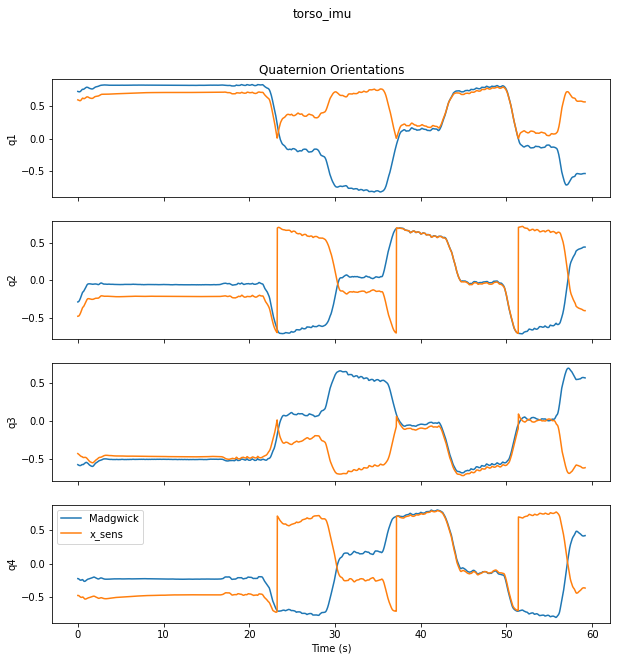

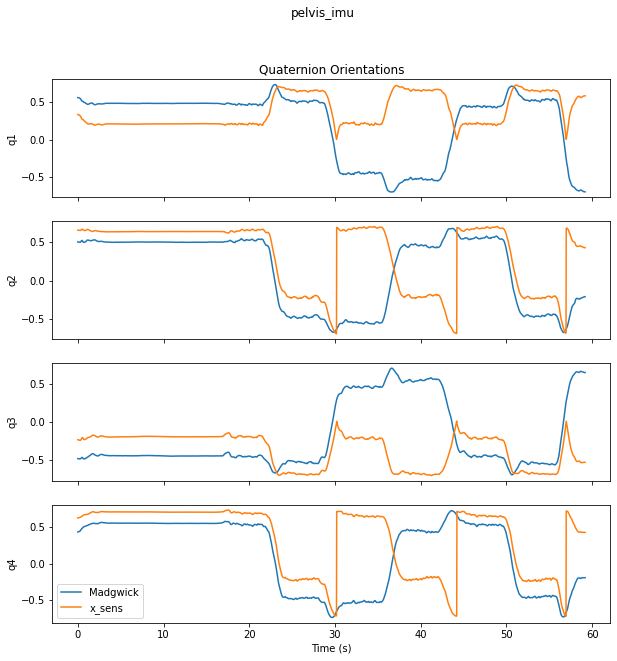

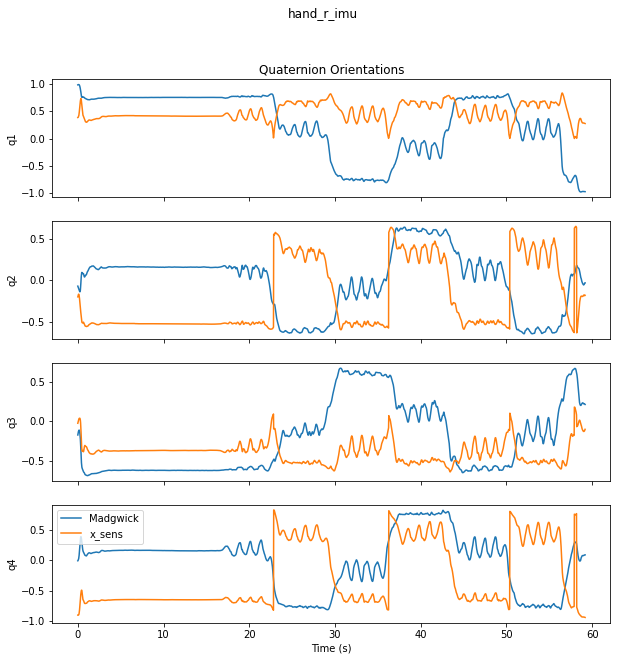

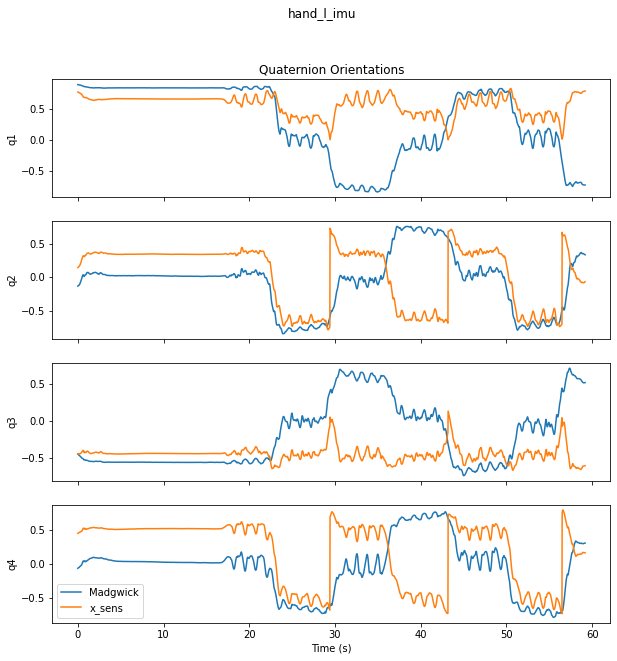

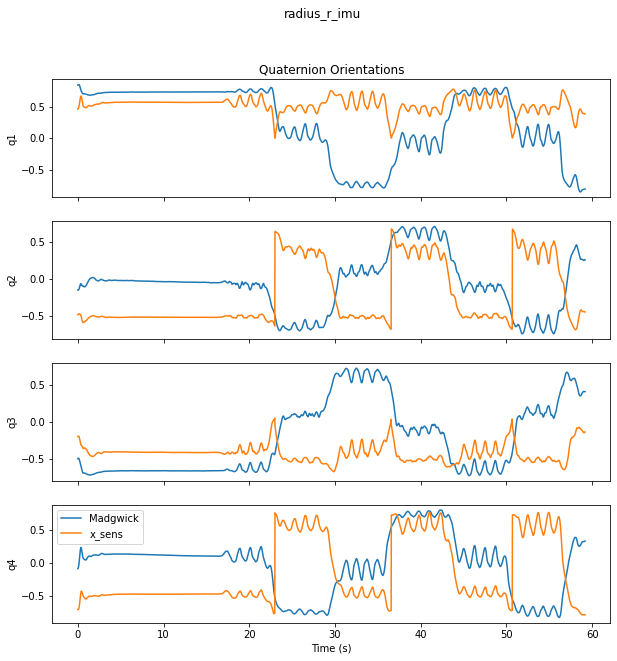

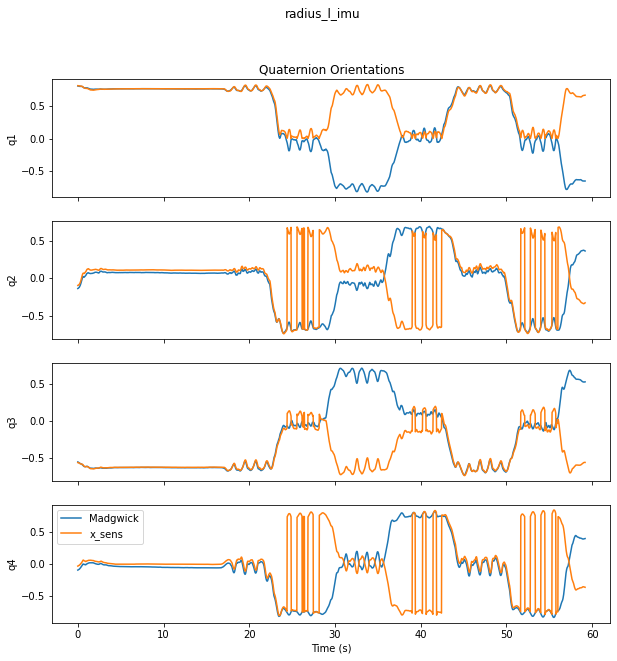

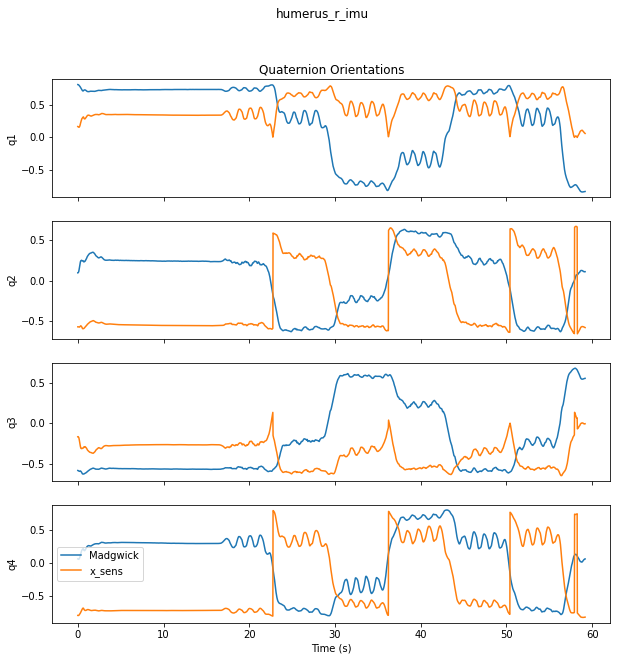

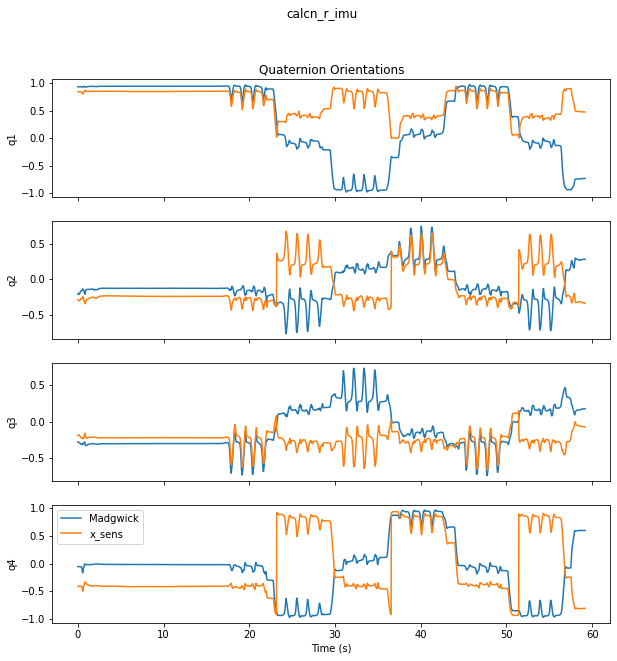

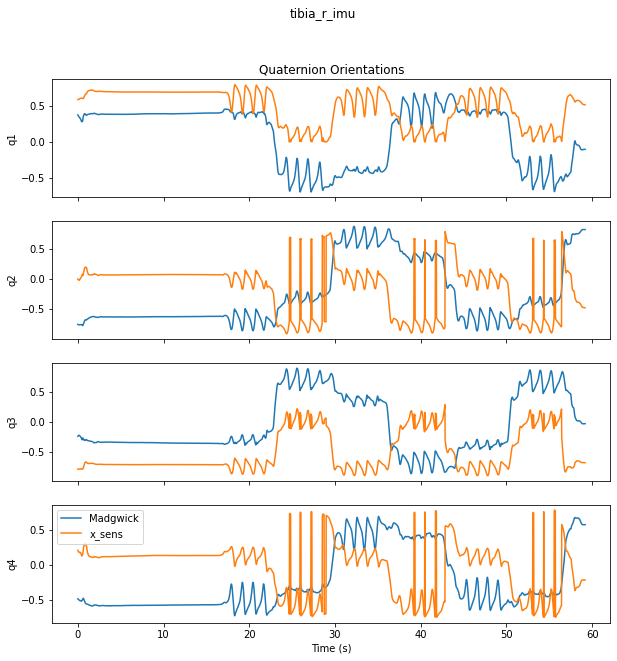

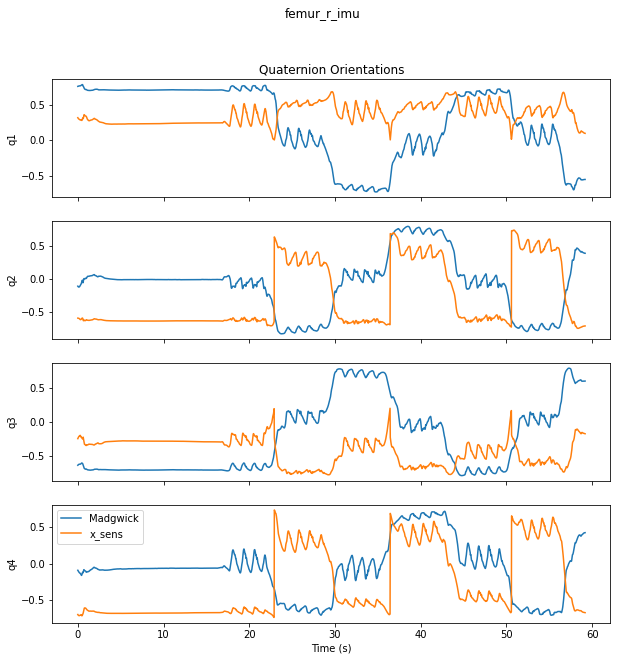

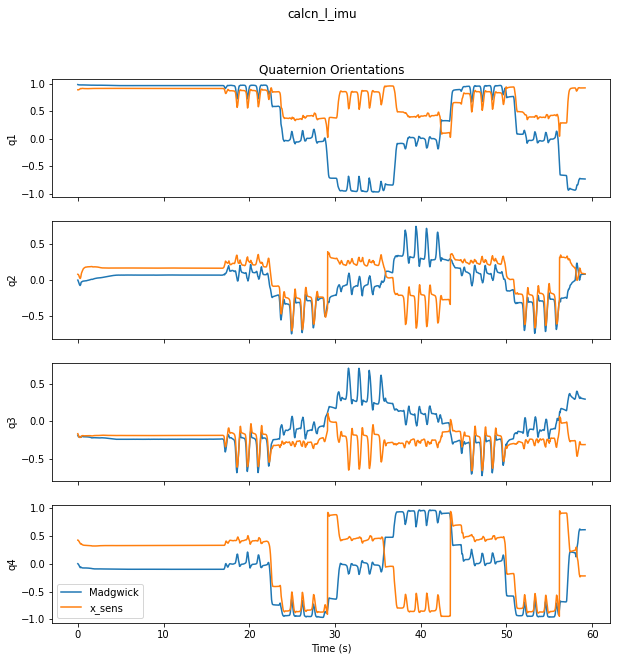

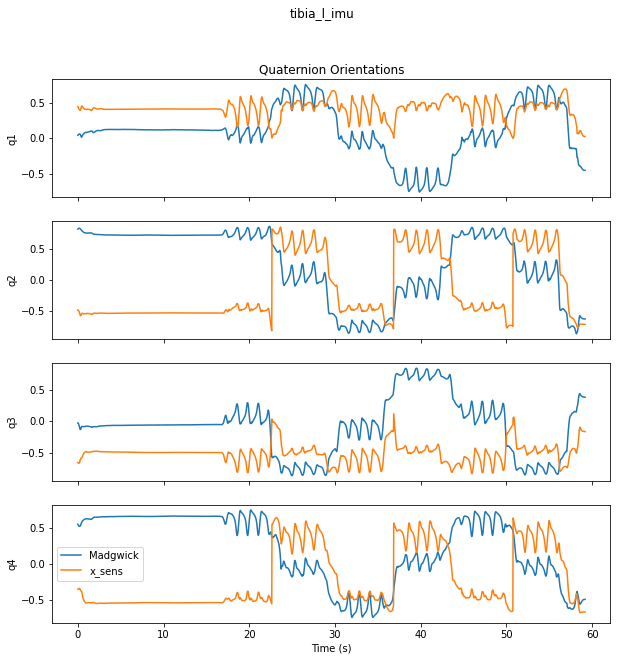

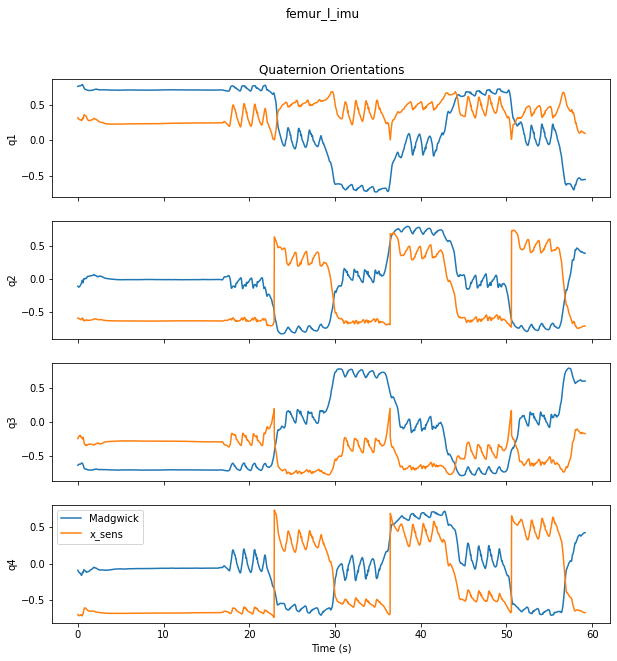

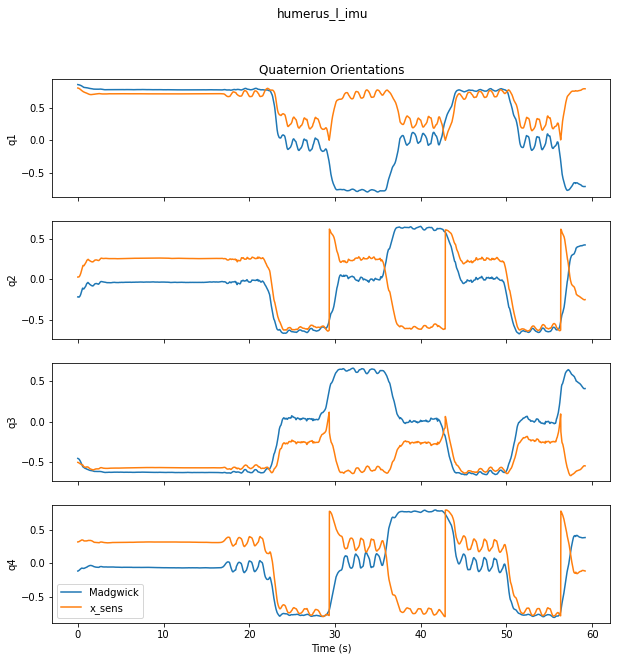

In [24]:
# Define the sensors to compare
t = time_df.time 
sensors = ['torso_imu', 'pelvis_imu', 'hand_r_imu', 'hand_l_imu', 'radius_r_imu',
           'radius_l_imu', 'humerus_r_imu', 'calcn_r_imu', 'tibia_r_imu',
           'femur_r_imu', 'calcn_l_imu', 'tibia_l_imu', 'femur_l_imu',
           'humerus_l_imu']

# Loop through each sensor and plot the q1, q2, q3, q4 values
for sensor in sensors:
    # Get the dataframes
    df1 = sensors_data[sensor]
    df2 = x_sens_sensors_data[sensor]

    # Set up the plot
    fig, axs = plt.subplots(4, 1, sharex=True, figsize=(10, 10))
    fig.suptitle(sensor)
    axs[0].set_title('Quaternion Orientations')

    # Plot the q1, q2, q3, q4 values
    for i, col in enumerate(['q1', 'q2', 'q3', 'q4']):
        axs[i].plot(t, df1[col], label='Madgwick')
        axs[i].plot(t, df2[col], label='x_sens')
        axs[i].set_ylabel(col)

    # Add a legend and x-axis label
    axs[-1].set_xlabel('Time (s)')
    plt.legend()

    # Show the plot
    plt.show()